In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
import sklearn as skl
import copy

from sklearn import metrics
import matplotlib.dates as mdates

In [4]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [5]:
import pandas_datareader.data as web
# from pandas_datareader import data as web

In [6]:
import yfinance as yf

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

# Import Data

## Stock Data

In [17]:
import yfinance as yf

stock_ticker = ['MSFT', 'IBM', 'GOOGL', 'AAPL']
stock_data = yf.download(tickers = stock_ticker, interval = "1d", start='2010-01-01', end='2015-01-01', group_by = 'column')

print(stock_data.shape)
stock_data.head()

[*********************100%%**********************]  4 of 4 completed

(1258, 24)


Price      Adj Close                                      Close             \
Ticker          AAPL      GOOGL        IBM       MSFT      AAPL      GOOGL   
Date                                                                         
2010-01-04  6.470741  15.684434  76.767441  23.431587  7.643214  15.684434   
2010-01-05  6.481928  15.615365  75.840080  23.439154  7.656429  15.615365   
2010-01-06  6.378824  15.221722  75.347397  23.295311  7.534643  15.221722   
2010-01-07  6.367033  14.867367  75.086594  23.053051  7.520714  14.867367   
2010-01-08  6.409361  15.065566  75.840080  23.212040  7.570714  15.065566   

Price                                  High             ...         Low  \
Ticker             IBM       MSFT      AAPL      GOOGL  ...         IBM   
Date                                                    ...               
2010-01-04  126.625237  30.950001  7.660714  15.753504  ...  125.095604   
2010-01-05  125.095604  30.959999  7.699643  15.711712  ...  124.378586   
2010-01-06  124.282982  30.770000  7.686786  15.662162  ...  124.101341   
2010-01-07  123.852776  30.450001  7.571429  15.265265  ...  123.240921   
2010-01-08  125.095604  30.660000  7.571429  15.096346  ...  123.374763   

Price                      Open                                       Volume  \
Ticker           MSFT      AAPL      GOOGL         IBM       MSFT       AAPL   
Date                                                                           
2010-01-04  30.590000  7.622500  15.689439  125.411087  30.620001  493729600   
2010-01-05  30.639999  7.664286  15.695195  125.889099  30.850000  601904800   
2010-01-06  30.520000  7.656429  15.662162  124.933075  30.879999  552160000   
2010-01-07  30.190001  7.562500  15.250250  124.158699  30.629999  477131200   
2010-01-08  30.240000  7.510714  14.814815  123.393883  30.280001  447610800   

Price                                     
Ticker          GOOGL      IBM      MSFT  
Date                                      
2010-01-04   78169752  6438444  38409100  
2010-01-05  120067812  7156104  49749600  
2010-01-06  158988852  5863144  58182400  
2010-01-07  256315428  6109268  50559700  
2010-01-08  188783028  4390271  51197400  

[5 rows x 24 columns]

In [18]:
# Check for missing data

stock_data.isna().sum()
# stock_data.loc[:,('Adj Close', 'MSFT')].isnull().unique()

Price      Ticker
Adj Close  AAPL      0
           GOOGL     0
           IBM       0
           MSFT      0
Close      AAPL      0
           GOOGL     0
           IBM       0
           MSFT      0
High       AAPL      0
           GOOGL     0
           IBM       0
           MSFT      0
Low        AAPL      0
           GOOGL     0
           IBM       0
           MSFT      0
Open       AAPL      0
           GOOGL     0
           IBM       0
           MSFT      0
Volume     AAPL      0
           GOOGL     0
           IBM       0
           MSFT      0
dtype: int64

In [19]:
# Flatten the dataframe

stock_data.columns = ['_'.join(col).strip() for col in stock_data.columns.values]
stock_data = stock_data.reset_index()

# Set Date as index

stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

stock_data.head()

,Adj Close_AAPL,Adj Close_GOOGL,Adj Close_IBM,Adj Close_MSFT,Close_AAPL,Close_GOOGL,Close_IBM,Close_MSFT,High_AAPL,High_GOOGL,...,Low_IBM,Low_MSFT,Open_AAPL,Open_GOOGL,Open_IBM,Open_MSFT,Volume_AAPL,Volume_GOOGL,Volume_IBM,Volume_MSFT
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.470741,15.684434,76.767441,23.431587,7.643214,15.684434,126.625237,30.950001,7.660714,15.753504,...,125.095604,30.590000,7.622500,15.689439,125.411087,30.620001,493729600,78169752,6438444,38409100
2010-01-05,6.481928,15.615365,75.840080,23.439154,7.656429,15.615365,125.095604,30.959999,7.699643,15.711712,...,124.378586,30.639999,7.664286,15.695195,125.889099,30.850000,601904800,120067812,7156104,49749600
2010-01-06,6.378824,15.221722,75.347397,23.295311,7.534643,15.221722,124.282982,30.770000,7.686786,15.662162,...,124.101341,30.520000,7.656429,15.662162,124.933075,30.879999,552160000,158988852,5863144,58182400
2010-01-07,6.367033,14.867367,75.086594,23.053051,7.520714,14.867367,123.852776,30.450001,7.571429,15.265265,...,123.240921,30.190001,7.562500,15.250250,124.158699,30.629999,477131200,256315428,6109268,50559700
2010-01-08,6.409361,15.065566,75.840080,23.212040,7.570714,15.065566,125.095604,30.660000,7.571429,15.096346,...,123.374763,30.240000,7.510714,14.814815,123.393883,30.280001,447610800,188783028,4390271,51197400


In [20]:
stock_data.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2014-12-17', '2014-12-18', '2014-12-19', '2014-12-22',
               '2014-12-23', '2014-12-24', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [21]:
stock_data.dtypes

Adj Close_AAPL     float64
Adj Close_GOOGL    float64
Adj Close_IBM      float64
Adj Close_MSFT     float64
Close_AAPL         float64
Close_GOOGL        float64
Close_IBM          float64
Close_MSFT         float64
High_AAPL          float64
High_GOOGL         float64
High_IBM           float64
High_MSFT          float64
Low_AAPL           float64
Low_GOOGL          float64
Low_IBM            float64
Low_MSFT           float64
Open_AAPL          float64
Open_GOOGL         float64
Open_IBM           float64
Open_MSFT          float64
Volume_AAPL          int64
Volume_GOOGL         int64
Volume_IBM           int64
Volume_MSFT          int64
dtype: object

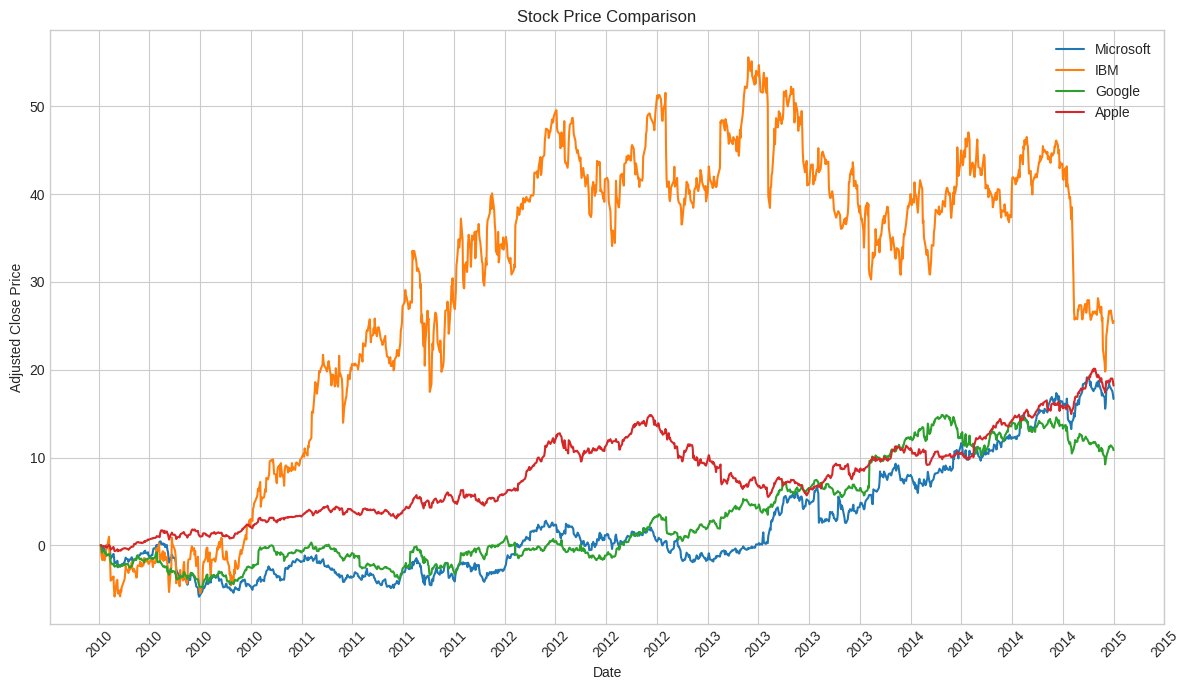

In [22]:
plt.style.use('seaborn-whitegrid')

plt.figure(figsize = (12, 7))

plt.plot(stock_data.index, stock_data['Adj Close_MSFT'] - stock_data['Adj Close_MSFT'].iloc[0], label = "Microsoft")
plt.plot(stock_data.index, stock_data['Adj Close_IBM'] - stock_data['Adj Close_IBM'].iloc[0], label = "IBM")
plt.plot(stock_data.index, stock_data['Adj Close_GOOGL'] - stock_data['Adj Close_GOOGL'].iloc[0], label = "Google")
plt.plot(stock_data.index, stock_data['Adj Close_AAPL'] - stock_data['Adj Close_AAPL'].iloc[0], label = "Apple")

# Set the x-axis to show quarters of each year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate dates
plt.xticks(rotation=45)

# Add grid, legend, and title
plt.grid(True)
plt.legend()
plt.title('Stock Price Comparison')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')

# Show the plot
plt.tight_layout()
plt.show()

## Index Data

In [26]:
index_ticker = ['^GSPC', '^DJI', '^IXIC', '^VIX']
index_data = yf.download(tickers = index_ticker, interval = "1d", start='2010-01-01', end='2015-01-01')

print(index_data.shape)
index_data.head()

[*********************100%%**********************]  4 of 4 completed

(1258, 24)


Price          Adj Close                                              Close  \
Ticker              ^DJI        ^GSPC        ^IXIC       ^VIX          ^DJI   
Date                                                                          
2010-01-04  10583.959961  1132.989990  2308.419922  20.040001  10583.959961   
2010-01-05  10572.019531  1136.520020  2308.709961  19.350000  10572.019531   
2010-01-06  10573.679688  1137.140015  2301.090088  19.160000  10573.679688   
2010-01-07  10606.860352  1141.689941  2300.050049  19.059999  10606.860352   
2010-01-08  10618.190430  1144.979980  2317.169922  18.129999  10618.190430   

Price                                                    High               \
Ticker            ^GSPC        ^IXIC       ^VIX          ^DJI        ^GSPC   
Date                                                                         
2010-01-04  1132.989990  2308.419922  20.040001  10604.969727  1133.869995   
2010-01-05  1136.520020  2308.709961  19.350000  10584.559570  1136.630005   
2010-01-06  1137.140015  2301.090088  19.160000  10594.990234  1139.189941   
2010-01-07  1141.689941  2300.050049  19.059999  10612.370117  1142.459961   
2010-01-08  1144.979980  2317.169922  18.129999  10619.400391  1145.390015   

Price       ...          Low                     Open               \
Ticker      ...        ^IXIC       ^VIX          ^DJI        ^GSPC   
Date        ...                                                      
2010-01-04  ...  2294.409912  20.030001  10430.690430  1116.560059   
2010-01-05  ...  2295.620117  19.340000  10584.559570  1132.660034   
2010-01-06  ...  2295.679932  18.770000  10564.719727  1135.709961   
2010-01-07  ...  2285.219971  18.700001  10571.110352  1136.270020   
2010-01-08  ...  2290.610107  18.110001  10606.400391  1140.520020   

Price                                  Volume                               
Ticker            ^IXIC       ^VIX       ^DJI       ^GSPC       ^IXIC ^VIX  
Date                                                                        
2010-01-04  2294.409912  21.680000  179780000  3991400000  1931380000    0  
2010-01-05  2307.270020  20.049999  188540000  2491020000  2367860000    0  
2010-01-06  2307.709961  19.590000  186040000  4972660000  2253340000    0  
2010-01-07  2298.090088  19.680000  217390000  5270680000  2270050000    0  
2010-01-08  2292.239990  19.270000  172710000  4389590000  2145390000    0  

[5 rows x 24 columns]

In [27]:
index_data.isna().sum()

Price      Ticker
Adj Close  ^DJI      0
           ^GSPC     0
           ^IXIC     0
           ^VIX      0
Close      ^DJI      0
           ^GSPC     0
           ^IXIC     0
           ^VIX      0
High       ^DJI      0
           ^GSPC     0
           ^IXIC     0
           ^VIX      0
Low        ^DJI      0
           ^GSPC     0
           ^IXIC     0
           ^VIX      0
Open       ^DJI      0
           ^GSPC     0
           ^IXIC     0
           ^VIX      0
Volume     ^DJI      0
           ^GSPC     0
           ^IXIC     0
           ^VIX      0
dtype: int64

In [28]:
# Flatten the dataframe

index_data.columns = ['_'.join(col).strip() for col in index_data.columns.values]
index_data = index_data.reset_index()

# Set Date as index

index_data['Date'] = pd.to_datetime(index_data['Date'])
index_data.set_index('Date', inplace=True)

index_data.head()

,Adj Close_^DJI,Adj Close_^GSPC,Adj Close_^IXIC,Adj Close_^VIX,Close_^DJI,Close_^GSPC,Close_^IXIC,Close_^VIX,High_^DJI,High_^GSPC,...,Low_^IXIC,Low_^VIX,Open_^DJI,Open_^GSPC,Open_^IXIC,Open_^VIX,Volume_^DJI,Volume_^GSPC,Volume_^IXIC,Volume_^VIX
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,10583.959961,1132.989990,2308.419922,20.040001,10583.959961,1132.989990,2308.419922,20.040001,10604.969727,1133.869995,...,2294.409912,20.030001,10430.690430,1116.560059,2294.409912,21.680000,179780000,3991400000,1931380000,0
2010-01-05,10572.019531,1136.520020,2308.709961,19.350000,10572.019531,1136.520020,2308.709961,19.350000,10584.559570,1136.630005,...,2295.620117,19.340000,10584.559570,1132.660034,2307.270020,20.049999,188540000,2491020000,2367860000,0
2010-01-06,10573.679688,1137.140015,2301.090088,19.160000,10573.679688,1137.140015,2301.090088,19.160000,10594.990234,1139.189941,...,2295.679932,18.770000,10564.719727,1135.709961,2307.709961,19.590000,186040000,4972660000,2253340000,0
2010-01-07,10606.860352,1141.689941,2300.050049,19.059999,10606.860352,1141.689941,2300.050049,19.059999,10612.370117,1142.459961,...,2285.219971,18.700001,10571.110352,1136.270020,2298.090088,19.680000,217390000,5270680000,2270050000,0
2010-01-08,10618.190430,1144.979980,2317.169922,18.129999,10618.190430,1144.979980,2317.169922,18.129999,10619.400391,1145.390015,...,2290.610107,18.110001,10606.400391,1140.520020,2292.239990,19.270000,172710000,4389590000,2145390000,0


In [29]:
index_data.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2014-12-17', '2014-12-18', '2014-12-19', '2014-12-22',
               '2014-12-23', '2014-12-24', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [30]:
index_data.dtypes

Adj Close_^DJI     float64
Adj Close_^GSPC    float64
Adj Close_^IXIC    float64
Adj Close_^VIX     float64
Close_^DJI         float64
Close_^GSPC        float64
Close_^IXIC        float64
Close_^VIX         float64
High_^DJI          float64
High_^GSPC         float64
High_^IXIC         float64
High_^VIX          float64
Low_^DJI           float64
Low_^GSPC          float64
Low_^IXIC          float64
Low_^VIX           float64
Open_^DJI          float64
Open_^GSPC         float64
Open_^IXIC         float64
Open_^VIX          float64
Volume_^DJI          int64
Volume_^GSPC         int64
Volume_^IXIC         int64
Volume_^VIX          int64
dtype: object

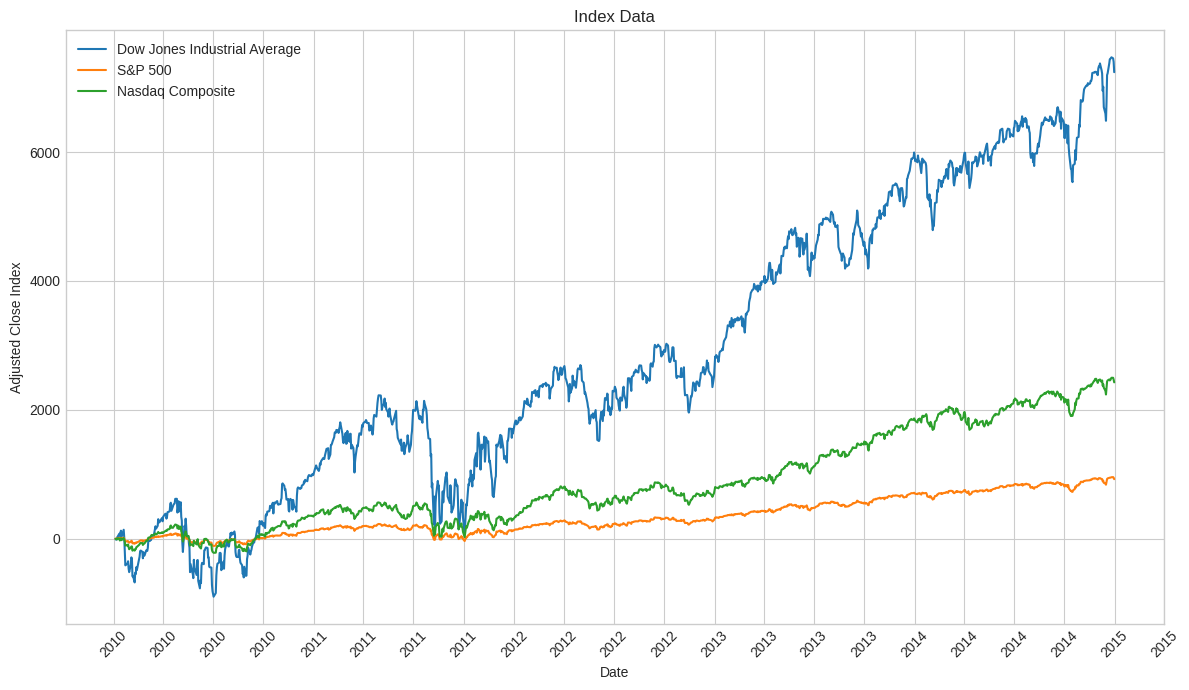

In [31]:
# plt.style.use('bmh')

plt.figure(figsize = (12, 7))

plt.plot(index_data.index, index_data['Adj Close_^DJI'] - index_data['Adj Close_^DJI'].iloc[0], label = "Dow Jones Industrial Average")
plt.plot(index_data.index, index_data['Adj Close_^GSPC'] -index_data['Adj Close_^GSPC'].iloc[0] , label = "S&P 500")
plt.plot(index_data.index, index_data['Adj Close_^IXIC'] - index_data['Adj Close_^IXIC'].iloc[0], label = "Nasdaq Composite")


# Set the x-axis to show quarters of each year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate dates
plt.xticks(rotation=45)

# Add grid, legend, and title
plt.grid(True)
plt.legend()
plt.title('Index Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Index')

# Show the plot
plt.tight_layout()
plt.show()

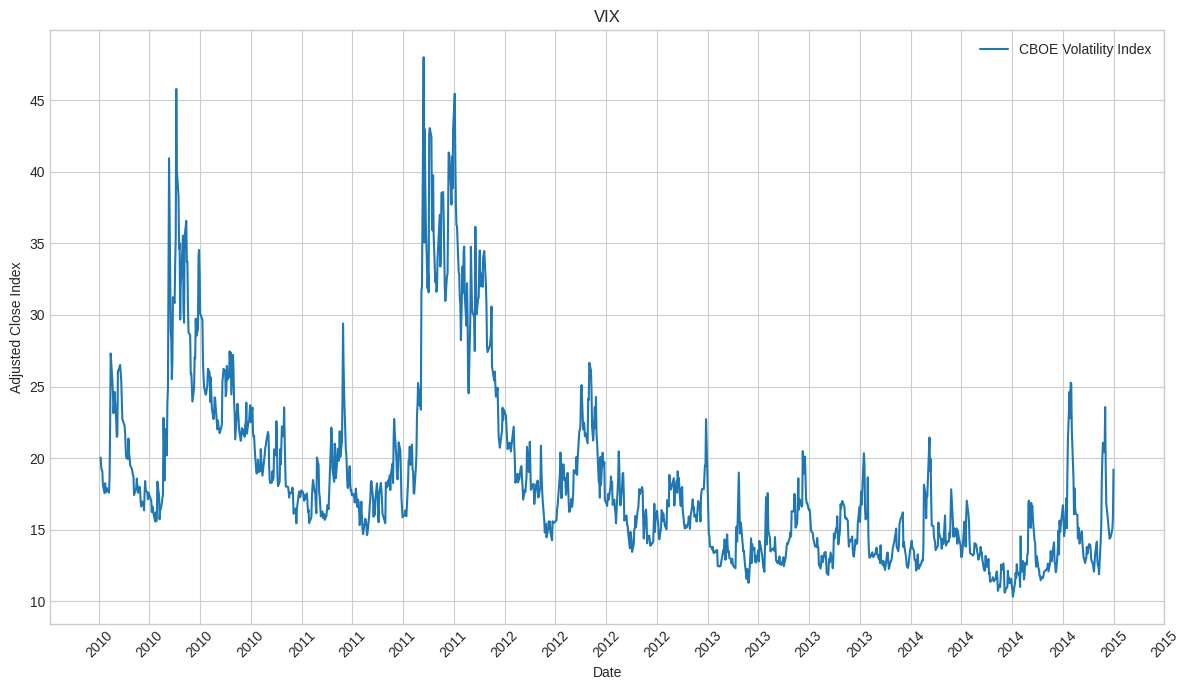

In [32]:
# plt.style.use('bmh')
plt.figure(figsize = (12, 7))

plt.plot(index_data.index, index_data['Adj Close_^VIX'], label = "CBOE Volatility Index")

# Set the x-axis to show quarters of each year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate dates
plt.xticks(rotation=45)

# Add grid, legend, and title
plt.grid(True)
plt.legend()
plt.title('VIX')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Index')

# Show the plot
plt.tight_layout()
plt.show()

## Exchange Data

In [33]:
fx_ticker = ['CAD=X', 'JPY=X', 'GBP=X']
fx_data = yf.download(tickers = fx_ticker, interval = "1d", start='2010-01-01', end='2015-01-01')

print(fx_data.shape)
fx_data.head()

[*********************100%%**********************]  3 of 3 completed

(1302, 18)


Price      Adj Close                       Close                        High  \
Ticker         CAD=X    GBP=X      JPY=X   CAD=X    GBP=X      JPY=X   CAD=X   
Date                                                                           
2010-01-01    1.0512  0.61985  92.919998  1.0512  0.61985  92.919998  1.0530   
2010-01-04    1.0410  0.62059  92.495003  1.0410  0.62059  92.495003  1.0514   
2010-01-05    1.0395  0.62536  91.584999  1.0395  0.62536  91.584999  1.0410   
2010-01-06    1.0319  0.62407  92.356003  1.0319  0.62407  92.356003  1.0407   
2010-01-07    1.0340  0.62759  93.389999  1.0340  0.62759  93.389999  1.0369   

Price                              Low                        Open           \
Ticker        GBP=X      JPY=X   CAD=X    GBP=X      JPY=X   CAD=X    GBP=X   
Date                                                                          
2010-01-01  0.61992  93.089996  1.0512  0.61797  92.919998  1.0517  0.61797   
2010-01-04  0.62247  93.200996  1.0354  0.61580  92.196999  1.0475  0.61969   
2010-01-05  0.62617  92.486000  1.0336  0.61897  91.282997  1.0407  0.62040   
2010-01-06  0.62720  92.709999  1.0313  0.62254  91.522003  1.0392  0.62525   
2010-01-07  0.62890  93.735001  1.0290  0.62272  92.110001  1.0315  0.62414   

Price                 Volume              
Ticker          JPY=X  CAD=X GBP=X JPY=X  
Date                                      
2010-01-01  92.940002    0.0     0     0  
2010-01-04  92.760002    0.0     0     0  
2010-01-05  92.470001    0.0     0     0  
2010-01-06  91.550003    0.0     0     0  
2010-01-07  92.335999    0.0     0     0

In [34]:
fx_data.isna().sum()

Price      Ticker
Adj Close  CAD=X     1
           GBP=X     0
           JPY=X     0
Close      CAD=X     1
           GBP=X     0
           JPY=X     0
High       CAD=X     1
           GBP=X     0
           JPY=X     0
Low        CAD=X     1
           GBP=X     0
           JPY=X     0
Open       CAD=X     1
           GBP=X     0
           JPY=X     0
Volume     CAD=X     1
           GBP=X     0
           JPY=X     0
dtype: int64

In [35]:
# Flatten the dataframe

fx_data.columns = ['_'.join(col).strip() for col in fx_data.columns.values]
fx_data = fx_data.reset_index()

# Set Date as index

fx_data['Date'] = pd.to_datetime(fx_data['Date'])
fx_data.set_index('Date', inplace=True)

fx_data.head()

,Adj Close_CAD=X,Adj Close_GBP=X,Adj Close_JPY=X,Close_CAD=X,Close_GBP=X,Close_JPY=X,High_CAD=X,High_GBP=X,High_JPY=X,Low_CAD=X,Low_GBP=X,Low_JPY=X,Open_CAD=X,Open_GBP=X,Open_JPY=X,Volume_CAD=X,Volume_GBP=X,Volume_JPY=X
Date,,,,,,,,,,,,,,,,,,
2010-01-01,1.0512,0.61985,92.919998,1.0512,0.61985,92.919998,1.0530,0.61992,93.089996,1.0512,0.61797,92.919998,1.0517,0.61797,92.940002,0.0,0,0
2010-01-04,1.0410,0.62059,92.495003,1.0410,0.62059,92.495003,1.0514,0.62247,93.200996,1.0354,0.61580,92.196999,1.0475,0.61969,92.760002,0.0,0,0
2010-01-05,1.0395,0.62536,91.584999,1.0395,0.62536,91.584999,1.0410,0.62617,92.486000,1.0336,0.61897,91.282997,1.0407,0.62040,92.470001,0.0,0,0
2010-01-06,1.0319,0.62407,92.356003,1.0319,0.62407,92.356003,1.0407,0.62720,92.709999,1.0313,0.62254,91.522003,1.0392,0.62525,91.550003,0.0,0,0
2010-01-07,1.0340,0.62759,93.389999,1.0340,0.62759,93.389999,1.0369,0.62890,93.735001,1.0290,0.62272,92.110001,1.0315,0.62414,92.335999,0.0,0,0


In [36]:
fx_data.index

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2014-12-18', '2014-12-19', '2014-12-22', '2014-12-23',
               '2014-12-24', '2014-12-25', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', length=1302, freq=None)

In [37]:
fx_data.dtypes

Adj Close_CAD=X    float64
Adj Close_GBP=X    float64
Adj Close_JPY=X    float64
Close_CAD=X        float64
Close_GBP=X        float64
Close_JPY=X        float64
High_CAD=X         float64
High_GBP=X         float64
High_JPY=X         float64
Low_CAD=X          float64
Low_GBP=X          float64
Low_JPY=X          float64
Open_CAD=X         float64
Open_GBP=X         float64
Open_JPY=X         float64
Volume_CAD=X       float64
Volume_GBP=X         int64
Volume_JPY=X         int64
dtype: object

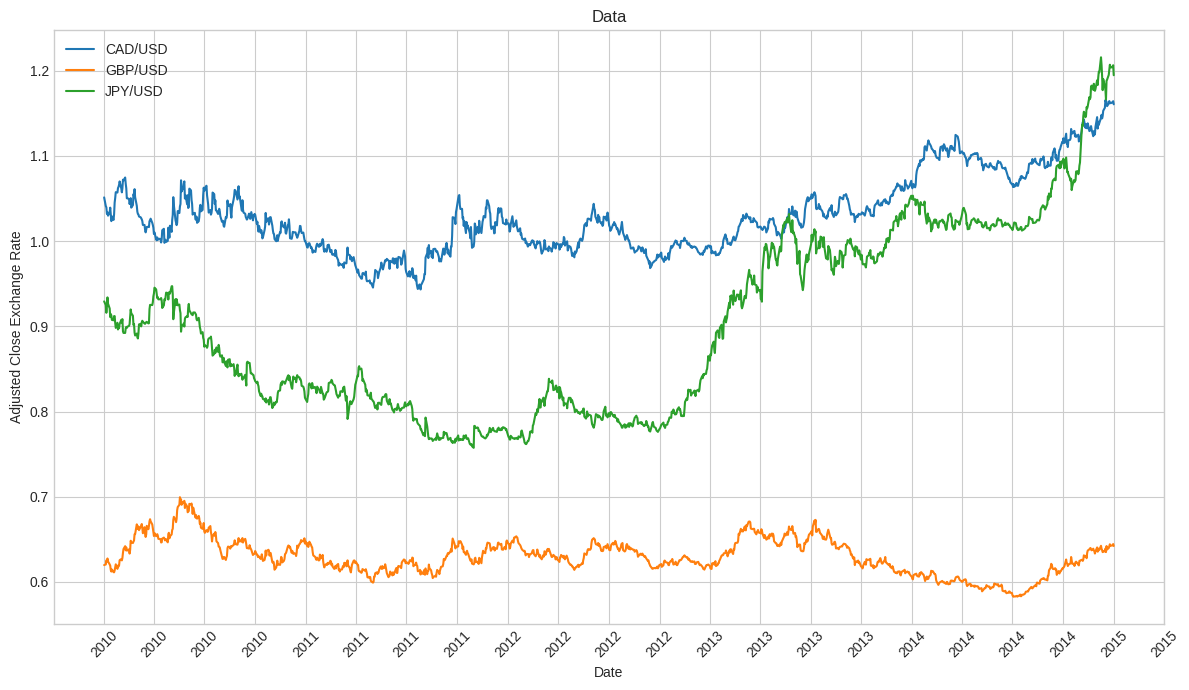

In [38]:
# plt.style.use('bmh')

plt.figure(figsize = (12, 7))

plt.plot(fx_data.index, fx_data['Adj Close_CAD=X'], label = "CAD/USD")
plt.plot(fx_data.index, fx_data['Adj Close_GBP=X'], label = "GBP/USD")
plt.plot(fx_data.index, fx_data['Adj Close_JPY=X']/100, label = "JPY/USD")


# Set the x-axis to show quarters of each year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate dates
plt.xticks(rotation=45)

# Add grid, legend, and title
plt.grid(True)
plt.legend()
plt.title('Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Exchange Rate')

# Show the plot
plt.tight_layout()
plt.show()

Instead of yfinance I could use pandas_datareader. BUT IT'S NOT RELIABLE AND DOESN'T WORK WELL

In [ ]:
# import pandas_datareader.data as web
# from pandas_datareader import data as web


# fx_ticker = ['DEXJPUS', 'DEXUSUK']
# index_ticker = ['SP500', 'DJIA', 'VIXCLS']

# fx_data = web.DataReader(fx_ticker, 'fred', start='2010-01-01', end='2015-01-01')
# index_data = web.DataReader(index_ticker, 'fred', start='2010-01-01', end='2015-01-01')

# Make Sample

In [39]:
print(stock_data.shape)
print(index_data.shape)
print(fx_data.shape)

# Convert the indices of the three DataFrames to sets
stock_dates = set(stock_data.index)
index_dates = set(index_data.index)
fx_dates = set(fx_data.index)

# Find the dates that are unique to fx_data
unique_fx_dates = fx_dates - (stock_dates.union(index_dates))

# Convert the set back to a list and sort it, if you want to view the dates in order
unique_fx_dates_sorted = sorted(list(unique_fx_dates))

print(len(unique_fx_dates))
print(unique_fx_dates_sorted)

(1258, 24)
(1258, 24)
(1302, 18)
46
[Timestamp('2010-01-01 00:00:00'), Timestamp('2010-01-18 00:00:00'), Timestamp('2010-02-15 00:00:00'), Timestamp('2010-04-02 00:00:00'), Timestamp('2010-05-31 00:00:00'), Timestamp('2010-07-05 00:00:00'), Timestamp('2010-09-06 00:00:00'), Timestamp('2010-11-25 00:00:00'), Timestamp('2010-12-24 00:00:00'), Timestamp('2011-01-17 00:00:00'), Timestamp('2011-02-21 00:00:00'), Timestamp('2011-04-22 00:00:00'), Timestamp('2011-05-30 00:00:00'), Timestamp('2011-07-04 00:00:00'), Timestamp('2011-09-05 00:00:00'), Timestamp('2011-11-24 00:00:00'), Timestamp('2011-12-26 00:00:00'), Timestamp('2012-01-02 00:00:00'), Timestamp('2012-01-16 00:00:00'), Timestamp('2012-02-20 00:00:00'), Timestamp('2012-04-06 00:00:00'), Timestamp('2012-05-28 00:00:00'), Timestamp('2012-07-04 00:00:00'), Timestamp('2012-09-03 00:00:00'), Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00'), Timestamp('2012-11-22 00:00:00'), Timestamp('2012-12-25 00:00:00'), Timestamp('

This discrepancy is due to differences in the trading days or availability of data, especially with FX markets being quoted on days when stock markets are closed. To handle this issue, we align all three datasets by their index (dates) before merging them into a single DataFrame

In [44]:
common_dates = stock_data.index.intersection(index_data.index).intersection(fx_data.index)

stock_data_aligned = stock_data.loc[common_dates]
index_data_aligned = index_data.loc[common_dates]
fx_data_aligned = fx_data.loc[common_dates]

data = {
    'MSFT': stock_data_aligned['Adj Close_MSFT'],
    'GOOGL': stock_data_aligned['Adj Close_GOOGL'],
    'IBM': stock_data_aligned['Adj Close_IBM'],
    'AAPL': stock_data_aligned['Adj Close_AAPL'],
    'DIA': index_data_aligned['Adj Close_^DJI'],
    'SPX': index_data_aligned['Adj Close_^GSPC'],
    'NSDQ': index_data_aligned['Adj Close_^IXIC'],
    'VIX': index_data_aligned['Adj Close_^VIX'],
    'CADUSD': fx_data_aligned['Adj Close_CAD=X'],
    'JPYUSD': fx_data_aligned['Adj Close_JPY=X'],
    'GBPUSD': fx_data_aligned['Adj Close_GBP=X']
}

# Create the final DataFrame
df = pd.DataFrame(data, index=common_dates)

In [45]:
print(df.shape)
print(df.isna().sum())

df = df.dropna()

print(df.shape)
print(df.isna().sum())

(1256, 11)
MSFT      0
GOOGL     0
IBM       0
AAPL      0
DIA       0
SPX       0
NSDQ      0
VIX       0
CADUSD    1
JPYUSD    0
GBPUSD    0
dtype: int64
(1255, 11)
MSFT      0
GOOGL     0
IBM       0
AAPL      0
DIA       0
SPX       0
NSDQ      0
VIX       0
CADUSD    0
JPYUSD    0
GBPUSD    0
dtype: int64


In [46]:
# Conver prices to daily returns

df = df.pct_change()
df = df.dropna()
df.head()

,MSFT,GOOGL,IBM,AAPL,DIA,SPX,NSDQ,VIX,CADUSD,JPYUSD,GBPUSD
Date,,,,,,,,,,,
2010-01-05,0.000323,-0.004404,-0.012080,0.001729,-0.001128,0.003116,0.000126,-0.034431,-0.001441,-0.009838,0.007686
2010-01-06,-0.006137,-0.025209,-0.006496,-0.015906,0.000157,0.000546,-0.003300,-0.009819,-0.007311,0.008418,-0.002063
2010-01-07,-0.010400,-0.023280,-0.003461,-0.001849,0.003138,0.004001,-0.000452,-0.005219,0.002035,0.011196,0.005640
2010-01-08,0.006897,0.013331,0.010035,0.006648,0.001068,0.002882,0.007443,-0.048793,-0.004062,-0.007817,-0.005625
2010-01-11,-0.012720,-0.001512,-0.010470,-0.008822,0.004313,0.001747,-0.002054,-0.031991,0.003884,-0.006130,-0.005512


# Exploratory Statistics

Descriptive Statistics

In [47]:
pd.set_option('display.precision', 4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

df.describe()

,MSFT,GOOGL,IBM,AAPL,DIA,SPX,NSDQ,VIX,CADUSD,JPYUSD,GBPUSD
count,1254.0000,1254.0000,1254.0000,1254.0000,1254.0000,1254.0000,1254.0000,1254.0000,1254.0000,1254.0000,1254.0000
mean,0.0005,0.0005,0.0003,0.0012,0.0005,0.0005,0.0006,0.0026,0.0001,0.0002,0.0000
std,0.0139,0.0157,0.0117,0.0168,0.0092,0.0101,0.0113,0.0748,0.0052,0.0063,0.0050
min,-0.1140,-0.0893,-0.0828,-0.1236,-0.0555,-0.0666,-0.0690,-0.2957,-0.0188,-0.0315,-0.0210
25%,-0.0075,-0.0072,-0.0055,-0.0074,-0.0036,-0.0039,-0.0045,-0.0388,-0.0028,-0.0032,-0.0029
50%,0.0002,0.0003,0.0002,0.0010,0.0006,0.0007,0.0011,-0.0053,-0.0001,0.0001,0.0000
75%,0.0085,0.0085,0.0064,0.0111,0.0050,0.0055,0.0067,0.0330,0.0029,0.0034,0.0029
max,0.0729,0.1380,0.0567,0.0887,0.0424,0.0474,0.0529,0.5000,0.0266,0.0382,0.0174


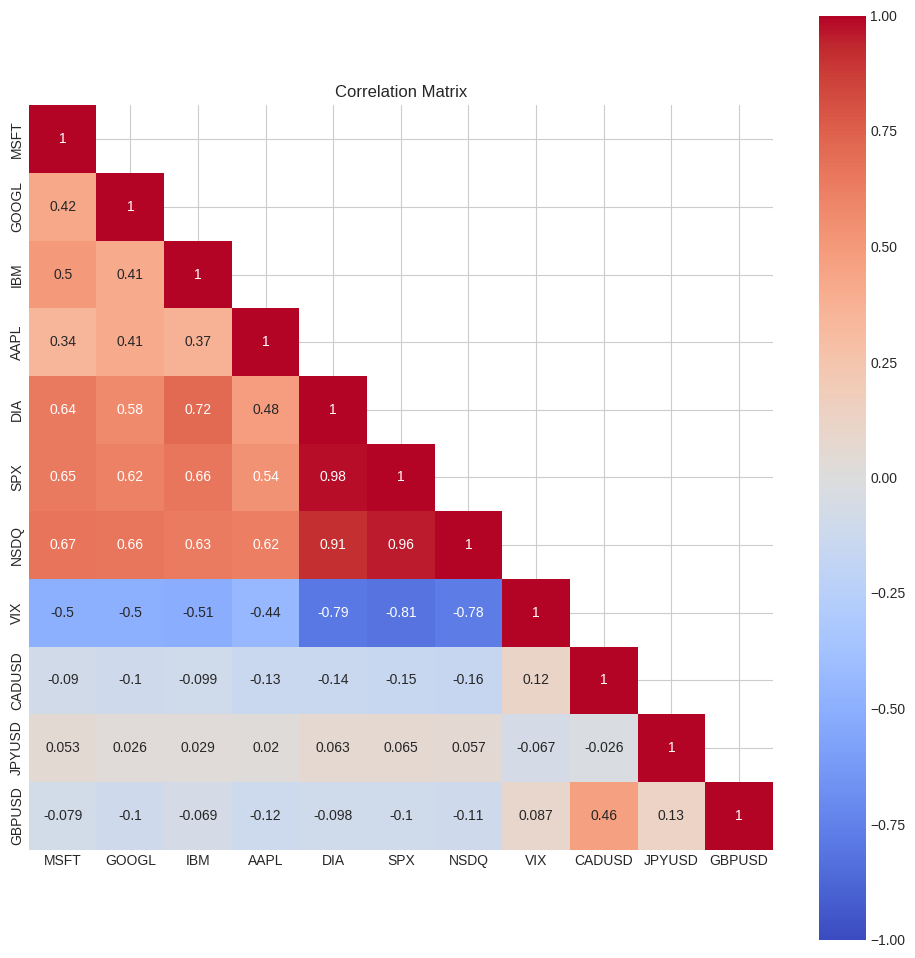

In [48]:
correlation = df.corr()
plt.figure(figsize=(12,12))
plt.title('Correlation Matrix')
mask = np.triu(np.ones_like(correlation, dtype = bool),  k = 1)
sns.heatmap(correlation, mask = mask, vmin=-1, vmax=1, square=True, annot=True, cmap='coolwarm')
plt.show()

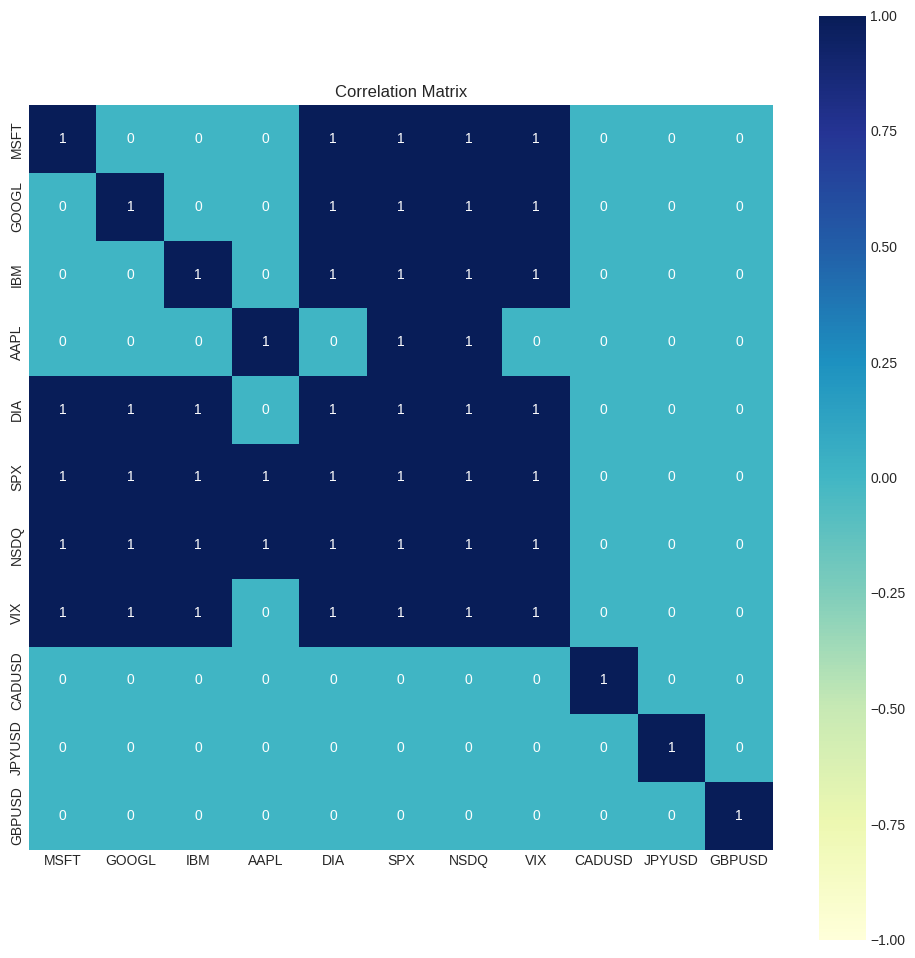

In [50]:
# Mask for absolute correlation >= 0.5

correlation = df.corr()
plt.figure(figsize=(12,12))
plt.title('Correlation Matrix')
sns.heatmap((np.abs(correlation) >= 0.5), vmin=-1, vmax=1, square=True,annot=True,cmap='YlGnBu')
plt.show()

<Figure size 1200x1200 with 0 Axes>

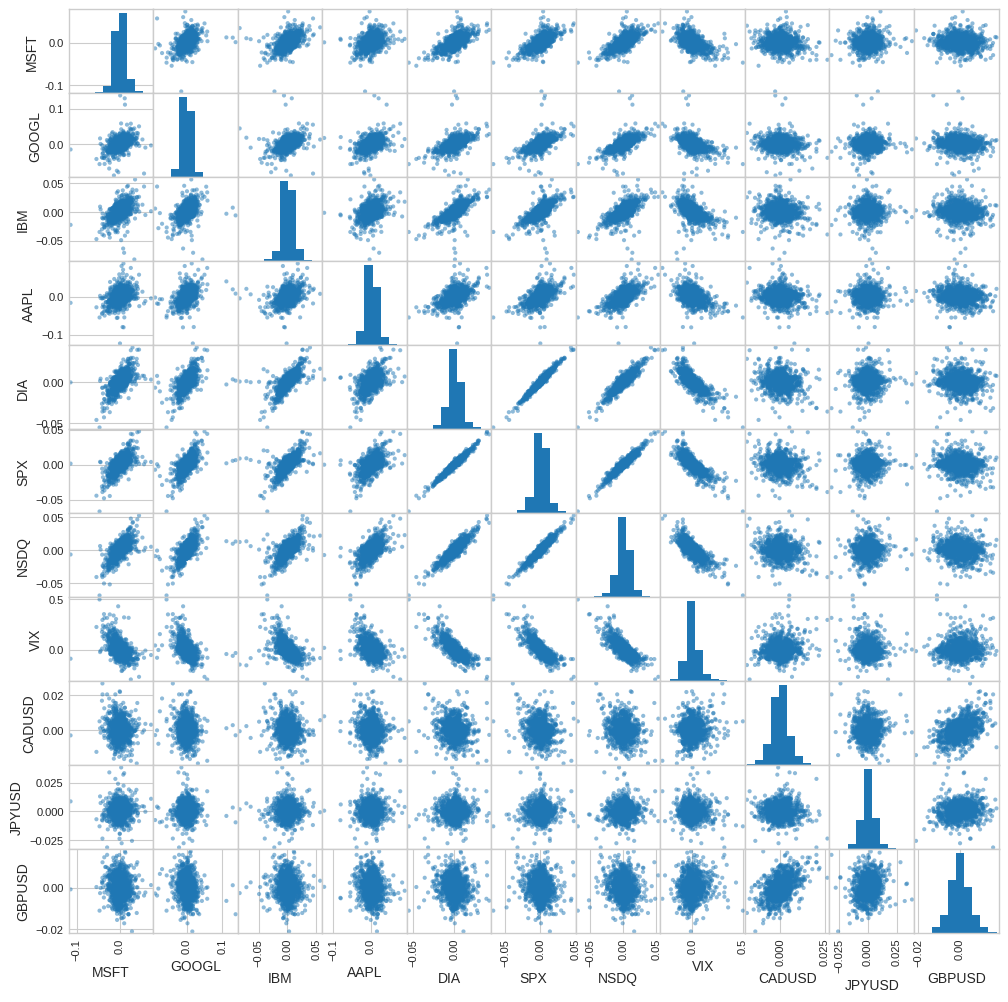

In [51]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=(12,12))
scatter_matrix(df,figsize=(12,12))
plt.show()

# Regression


In [52]:
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [53]:
# Train-Test Split

rate = 0.8
index = int(rate * len(df))

X_train = df.drop('MSFT', axis = 1).iloc[:index].values
Y_train = df['MSFT'].iloc[:index].values

X_test = df.drop('MSFT', axis = 1).iloc[index:].values
Y_test = df['MSFT'].iloc[index:].values

print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")

X_train shape: (1003, 10), Y_train shape: (1003,)
X_test shape: (251, 10), Y_test shape: (251,)


In [54]:
LR = LinearRegression(fit_intercept = True).fit(X_train, Y_train)
LASSO = Lasso(alpha = 10e-6).fit(X_train, Y_train)
ElN = ElasticNet(alpha = 10e-6).fit(X_train, Y_train)

LR_fit = LR.predict(X_train)
LR_pred = LR.predict(X_test)
LASSO_fit = LASSO.predict(X_train)
LASSO_pred = LASSO.predict(X_test)
ElN_fit = ElN.predict(X_train)
ElN_pred = ElN.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculating metrics for Linear Regression
LR_RMSE_train = mean_squared_error(Y_train, LR_fit, squared=False)
LR_RMSE_test = mean_squared_error(Y_test, LR_pred, squared=False)
LR_MAE_train = mean_absolute_error(Y_train, LR_fit)
LR_MAE_test = mean_absolute_error(Y_test, LR_pred)
LR_R2_train = r2_score(Y_train, LR_fit)
LR_R2_test = r2_score(Y_test, LR_pred)

# Calculating metrics for LASSO
LASSO_RMSE_train = mean_squared_error(Y_train, LASSO_fit, squared=False)
LASSO_RMSE_test = mean_squared_error(Y_test, LASSO_pred, squared=False)
LASSO_MAE_train = mean_absolute_error(Y_train, LASSO_fit)
LASSO_MAE_test = mean_absolute_error(Y_test, LASSO_pred)
LASSO_R2_train = r2_score(Y_train, LASSO_fit)
LASSO_R2_test = r2_score(Y_test, LASSO_pred)

# Calculating metrics for ElasticNet
ElN_RMSE_train = mean_squared_error(Y_train, ElN_fit, squared=False)
ElN_RMSE_test = mean_squared_error(Y_test, ElN_pred, squared=False)
ElN_MAE_train = mean_absolute_error(Y_train, ElN_fit)
ElN_MAE_test = mean_absolute_error(Y_test, ElN_pred)
ElN_R2_train = r2_score(Y_train, ElN_fit)
ElN_R2_test = r2_score(Y_test, ElN_pred)

metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'LASSO', 'ElasticNet'],
    'RMSE_train': [LR_RMSE_train, LASSO_RMSE_train, ElN_RMSE_train],
    'RMSE_test': [LR_RMSE_test, LASSO_RMSE_test, ElN_RMSE_test],
    'MAE_train': [LR_MAE_train, LASSO_MAE_train, ElN_MAE_train],
    'MAE_test': [LR_MAE_test, LASSO_MAE_test, ElN_MAE_test],
    'R2_train': [LR_R2_train, LASSO_R2_train, ElN_R2_train],
    'R2_test': [LR_R2_test, LASSO_R2_test, ElN_R2_test]
})

metrics_df['RMSE_diff'] = metrics_df['RMSE_test'] - metrics_df['RMSE_train']
metrics_df['MAE_diff'] = metrics_df['MAE_test'] - metrics_df['MAE_train']
metrics_df['R2_diff'] = metrics_df['R2_test'] - metrics_df['R2_train']

In [56]:
metrics_df_copy = metrics_df.copy()

for col in metrics_df_copy.columns:
    if pd.api.types.is_numeric_dtype(metrics_df_copy[col]):
        metrics_df_copy[col] *= 100

metrics_df_copy

,Model,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_train,R2_test,RMSE_diff,MAE_diff,R2_diff
0,Linear Regression,1.0170,1.0148,0.6929,0.7747,50.0575,28.1276,-0.0022,0.0818,-21.9299
1,LASSO,1.0495,0.9813,0.7120,0.7409,46.8127,32.7930,-0.0682,0.0288,-14.0197
2,ElasticNet,1.0418,0.9730,0.7063,0.7350,47.5899,33.9167,-0.0688,0.0288,-13.6732


In [58]:
# Extract coefficients

coefficients = {
    'LinearRegression': LR.coef_,
    'Lasso': LASSO.coef_,
    'ElasticNet': ElN.coef_
}

# Create DataFrame
coefficients_df = pd.DataFrame(coefficients, index=df.drop('MSFT', axis=1).columns)
coefficients_df

,LinearRegression,Lasso,ElasticNet
GOOGL,-0.0392,0.0000,0.0000
IBM,0.0236,0.0839,0.0966
AAPL,-0.1043,-0.0000,-0.0172
DIA,0.9969,0.0000,0.1565
SPX,-1.2749,0.0000,0.0000
NSDQ,1.3608,0.6688,0.6058
VIX,0.0089,-0.0076,-0.0009
CADUSD,0.0775,0.0000,0.0000
JPYUSD,-0.0033,-0.0000,-0.0000
GBPUSD,-0.0651,-0.0000,-0.0000


In [59]:
# Standard Deviations and p-values

def extract_stats(model, X, y):
    model_stats = sm.OLS(y, X).fit()
    return model_stats.params, model_stats.bse, model_stats.pvalues

coefficients = {}
std_errors = {}
p_values = {}

for model, model_obj in [('LR', LR), ('LASSO', LASSO), ('ElN', ElN)]:
    coefficients[model], std_errors[model], p_values[model] = extract_stats(model_obj, X_train, Y_train)

# Create DataFrame
result_df = pd.DataFrame()

for model in ['LR', 'LASSO', 'ElN']:
    result_df[f'{model}_coef'] = coefficients[model]
    result_df[f'{model}_std'] = std_errors[model]
    result_df[f'{model}_p_value'] = p_values[model]

result_df

,LR_coef,LR_std,LR_p_value,LASSO_coef,LASSO_std,LASSO_p_value,ElN_coef,ElN_std,ElN_p_value
0,-0.0393,0.0263,0.1356,-0.0393,0.0263,0.1356,-0.0393,0.0263,0.1356
1,0.0238,0.0439,0.5882,0.0238,0.0439,0.5882,0.0238,0.0439,0.5882
2,-0.1049,0.0253,0.0000,-0.1049,0.0253,0.0000,-0.1049,0.0253,0.0000
3,0.9952,0.2069,0.0000,0.9952,0.2069,0.0000,0.9952,0.2069,0.0000
4,-1.2762,0.2543,0.0000,-1.2762,0.2543,0.0000,-1.2762,0.2543,0.0000
5,1.3602,0.1268,0.0000,1.3602,0.1268,0.0000,1.3602,0.1268,0.0000
6,0.0083,0.0075,0.2686,0.0083,0.0075,0.2686,0.0083,0.0075,0.2686
7,0.0766,0.0692,0.2688,0.0766,0.0692,0.2688,0.0766,0.0692,0.2688
8,-0.0041,0.0505,0.9353,-0.0041,0.0505,0.9353,-0.0041,0.0505,0.9353
9,-0.0647,0.0716,0.3662,-0.0647,0.0716,0.3662,-0.0647,0.0716,0.3662


# Regression Results



In the last step, we will visualize the output of the selected model and compare the
modeled data against the actual data. In order to visualize the chart, we convert the return time series to cumulative total return. We also assume an initial investment of $1000. Let us look at the plot of actual versus
predicted data:

In [60]:
df_results = pd.DataFrame(index = df.index)

df_results['CTR'] = (1 + df['MSFT']).cumprod() *1000
df_results.loc[index:, 'LR_CTR'] = np.cumprod(1 + LR_pred) *1000
df_results.loc[index:, 'LASSO_CTR'] = np.cumprod(1 + LASSO_pred) *1000
df_results.loc[index:, 'ElN_CTR'] = np.cumprod(1 + ElN_pred) *1000

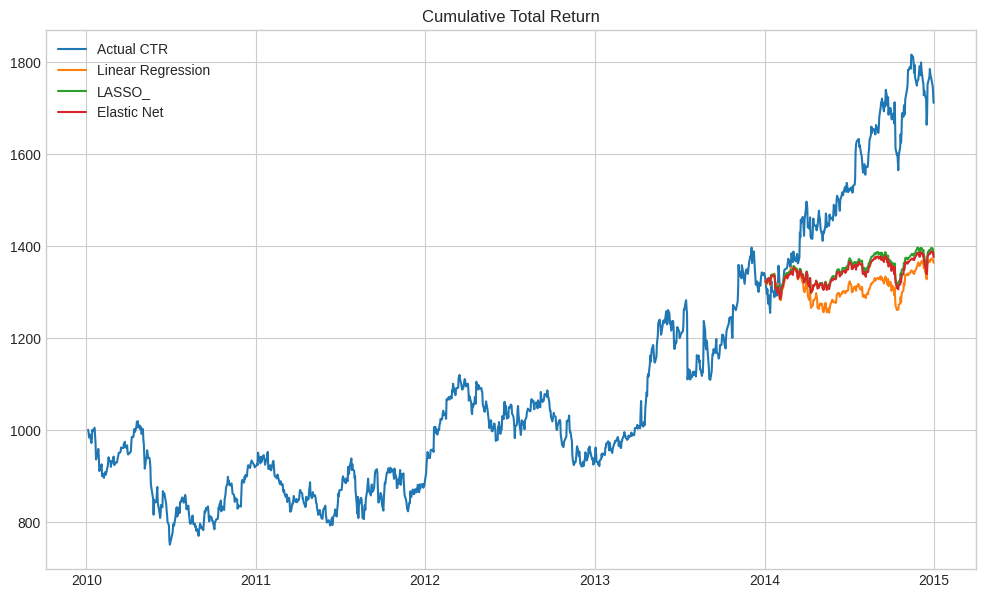

In [61]:
plt.figure(figsize = (12, 7))

shift = df_results['CTR'].iloc[index] - 1000

plt.plot(df_results['CTR'], label = 'Actual CTR')
plt.plot(df_results['LR_CTR'] + shift, label = 'Linear Regression')
plt.plot(df_results['LASSO_CTR'] + shift, label = 'LASSO_')
plt.plot(df_results['ElN_CTR'] + shift, label = 'Elastic Net')

plt.legend()
plt.title('Cumulative Total Return')

plt.show()

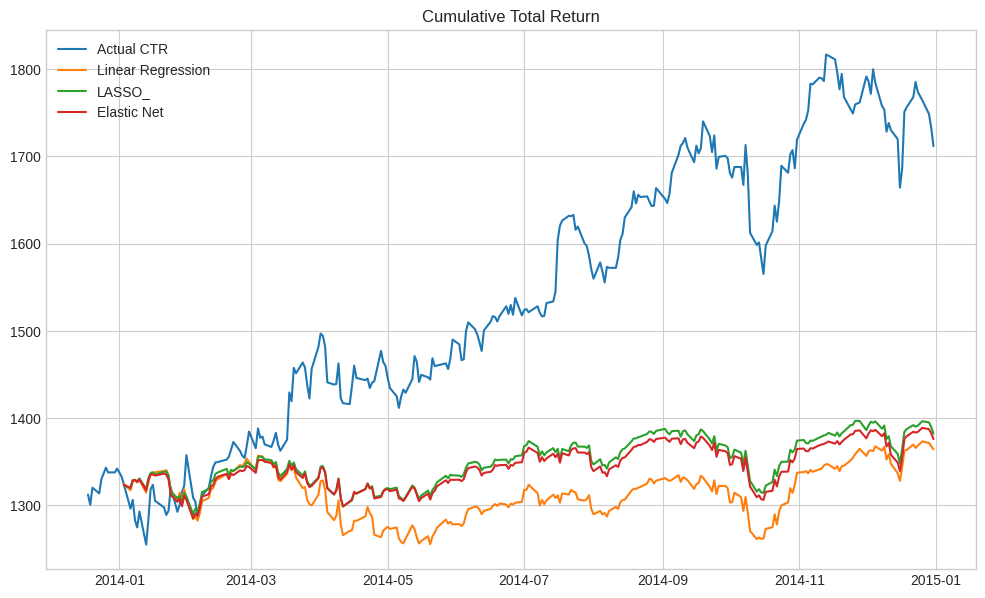

In [62]:
plt.figure(figsize = (12, 7))

shift = df_results['CTR'].iloc[index] - 1000

plt.plot(df_results['CTR'].iloc[index-10:], label = 'Actual CTR')
plt.plot(df_results['LR_CTR'] + shift, label = 'Linear Regression')
plt.plot(df_results['LASSO_CTR'] + shift, label = 'LASSO_')
plt.plot(df_results['ElN_CTR'] + shift, label = 'Elastic Net')

plt.legend()
plt.title('Cumulative Total Return')

plt.show()

# Polynomial Regression



In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial degree (2 for squared terms)
degree = 2

# Create polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Linear Regression with squared terms
LR_poly = LinearRegression(fit_intercept=True).fit(X_train_poly, Y_train)

# Lasso Regression with squared terms
LASSO_poly = Lasso(alpha=10e-6).fit(X_train_poly, Y_train)

# ElasticNet with squared terms
ElN_poly = ElasticNet(alpha=10e-6).fit(X_train_poly, Y_train)

# Predictions
Y_pred_LR = LR_poly.predict(X_test_poly)
Y_pred_LASSO = LASSO_poly.predict(X_test_poly)
Y_pred_ElN = ElN_poly.predict(X_test_poly)

# Evaluation
mse_LR = mean_squared_error(Y_test, Y_pred_LR)
mse_LASSO = mean_squared_error(Y_test, Y_pred_LASSO)
mse_ElN = mean_squared_error(Y_test, Y_pred_ElN)

print("Linear Regression MSE (with squared terms):", mse_LR)
print("Lasso Regression MSE (with squared terms):", mse_LASSO)
print("ElasticNet MSE (with squared terms):", mse_ElN)

Linear Regression MSE (with squared terms): 0.00010429283480070329
Lasso Regression MSE (with squared terms): 9.628944602018191e-05
ElasticNet MSE (with squared terms): 9.467944218101333e-05


In [64]:
poly_results = pd.DataFrame(index = df.index)

poly_results['CTR'] = (1 + df['MSFT']).cumprod() *1000
poly_results.loc[index:, 'poly_LR_CTR'] = np.cumprod(1 + Y_pred_LR) *1000
poly_results.loc[index:, 'poly_LASSO_CTR'] = np.cumprod(1 + Y_pred_LASSO) *1000
poly_results.loc[index:, 'poly_ElN_CTR'] = np.cumprod(1 + Y_pred_LR) *1000

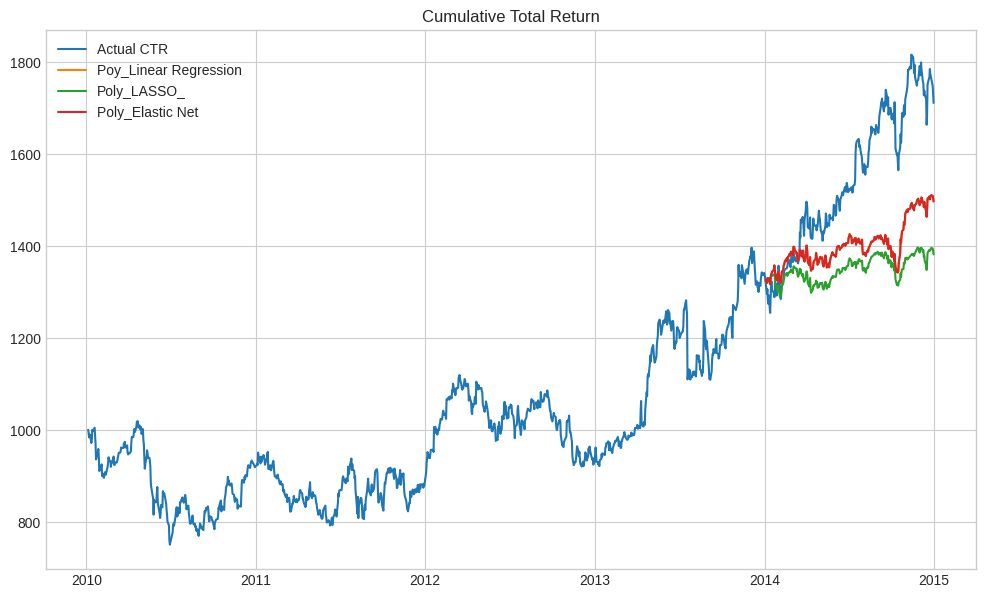

In [65]:
plt.figure(figsize = (12, 7))

shift = df_results['CTR'].iloc[index] - 1000

plt.plot(poly_results['CTR'], label = 'Actual CTR')
plt.plot(poly_results['poly_LR_CTR'] + shift, label = 'Poy_Linear Regression')
plt.plot(poly_results['poly_LASSO_CTR'] + shift, label = 'Poly_LASSO_')
plt.plot(poly_results['poly_ElN_CTR'] + shift, label = 'Poly_Elastic Net')

plt.legend()
plt.title('Cumulative Total Return')
plt.show()

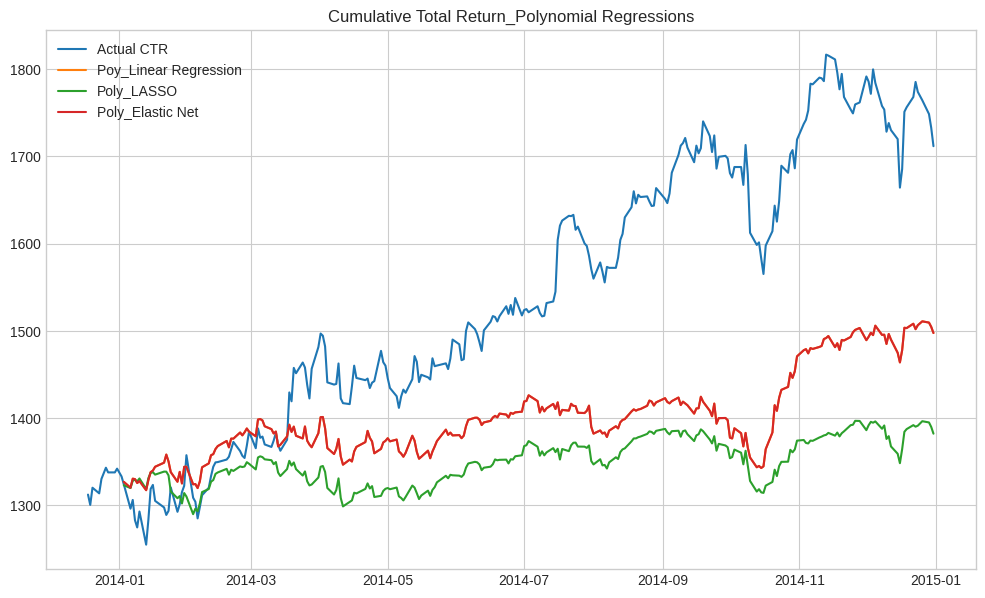

In [66]:
plt.figure(figsize = (12, 7))

shift = df_results['CTR'].iloc[index] - 1000

plt.plot(poly_results['CTR'].iloc[index-10:], label = 'Actual CTR')
plt.plot(poly_results['poly_LR_CTR'] + shift, label = 'Poy_Linear Regression')
plt.plot(poly_results['poly_LASSO_CTR'] + shift, label = 'Poly_LASSO')
plt.plot(poly_results['poly_ElN_CTR'] + shift, label = 'Poly_Elastic Net')

plt.legend()
plt.title('Cumulative Total Return_Polynomial Regressions')
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate RMSE, MAE, and R2 for Linear Regression (in-sample)
rmse_LR_train = mean_squared_error(Y_train, LR_poly.predict(X_train_poly), squared=False)
mae_LR_train = mean_absolute_error(Y_train, LR_poly.predict(X_train_poly))
r2_LR_train = r2_score(Y_train, LR_poly.predict(X_train_poly))

# Calculate RMSE, MAE, and R2 for Lasso Regression (in-sample)
rmse_LASSO_train = mean_squared_error(Y_train, LASSO_poly.predict(X_train_poly), squared=False)
mae_LASSO_train = mean_absolute_error(Y_train, LASSO_poly.predict(X_train_poly))
r2_LASSO_train = r2_score(Y_train, LASSO_poly.predict(X_train_poly))

# Calculate RMSE, MAE, and R2 for ElasticNet (in-sample)
rmse_ElN_train = mean_squared_error(Y_train, ElN_poly.predict(X_train_poly), squared=False)
mae_ElN_train = mean_absolute_error(Y_train, ElN_poly.predict(X_train_poly))
r2_ElN_train = r2_score(Y_train, ElN_poly.predict(X_train_poly))

# Calculate RMSE, MAE, and R2 for Linear Regression (out-of-sample)
rmse_LR_test = mean_squared_error(Y_test, Y_pred_LR, squared=False)
mae_LR_test = mean_absolute_error(Y_test, Y_pred_LR)
r2_LR_test = r2_score(Y_test, Y_pred_LR)

# Calculate RMSE, MAE, and R2 for Lasso Regression (out-of-sample)
rmse_LASSO_test = mean_squared_error(Y_test, Y_pred_LASSO, squared=False)
mae_LASSO_test = mean_absolute_error(Y_test, Y_pred_LASSO)
r2_LASSO_test = r2_score(Y_test, Y_pred_LASSO)

# Calculate RMSE, MAE, and R2 for ElasticNet (out-of-sample)
rmse_ElN_test = mean_squared_error(Y_test, Y_pred_ElN, squared=False)
mae_ElN_test = mean_absolute_error(Y_test, Y_pred_ElN)
r2_ElN_test = r2_score(Y_test, Y_pred_ElN)

# Create DataFrame to compare the metrics
data = {
    'Model': ['Linear Regression', 'Lasso Regression', 'ElasticNet'],
    'RMSE (Train)': [rmse_LR_train, rmse_LASSO_train, rmse_ElN_train],
    'MAE (Train)': [mae_LR_train, mae_LASSO_train, mae_ElN_train],
    'R2 (Train)': [r2_LR_train, r2_LASSO_train, r2_ElN_train],
    'RMSE (Test)': [rmse_LR_test, rmse_LASSO_test, rmse_ElN_test],
    'MAE (Test)': [mae_LR_test, mae_LASSO_test, mae_ElN_test],
    'R2 (Test)': [r2_LR_test, r2_LASSO_test, r2_ElN_test]
}

metrics_df = pd.DataFrame(data)
metrics_df

,Model,RMSE (Train),MAE (Train),R2 (Train),RMSE (Test),MAE (Test),R2 (Test)
0,Linear Regression,0.0097,0.0067,0.5496,0.0102,0.0079,0.2721
1,Lasso Regression,0.0105,0.0071,0.4681,0.0098,0.0074,0.3279
2,ElasticNet,0.0104,0.0071,0.4759,0.0097,0.0074,0.3392


Compare LR with Polynomial Regression

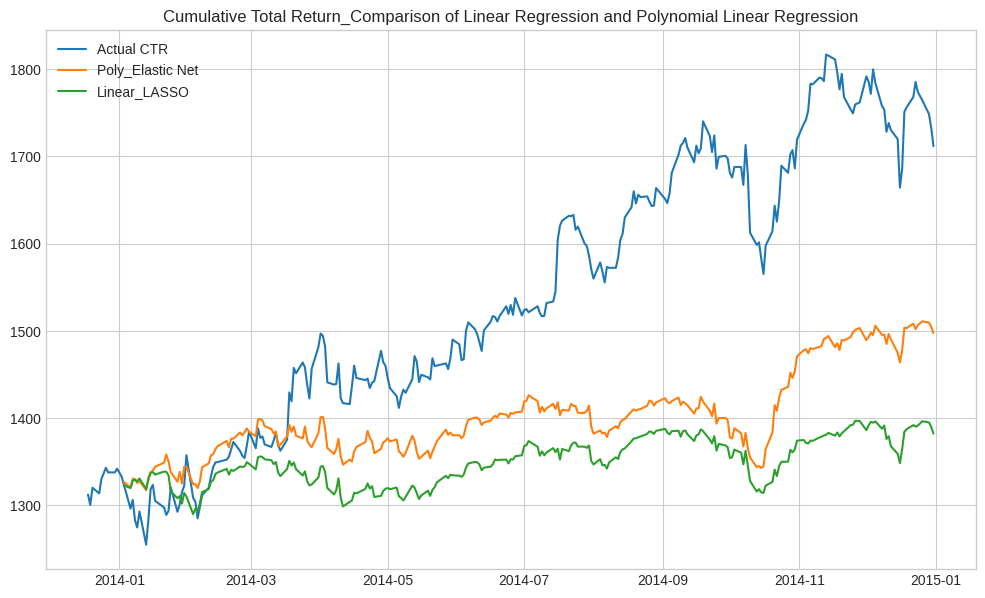

In [70]:
plt.figure(figsize = (12, 7))

shift = df_results['CTR'].iloc[index] - 1000

plt.plot(poly_results['CTR'].iloc[index-10:], label = 'Actual CTR')
plt.plot(poly_results['poly_ElN_CTR'] + shift, label = 'Poly_Elastic Net')
plt.plot(df_results['LASSO_CTR'] + shift, label = 'Linear_LASSO')

plt.legend()
plt.title('Cumulative Total Return_Comparison of Linear Regression and Polynomial Linear Regression')
plt.show()

In [73]:
# Data for comparison
data = {
    'Metric': ['RMSE', 'MAE', 'R2'],
    'Poly_ElN_In-Sample': [rmse_ElN_train, mae_ElN_train, r2_ElN_train],
    'Poly_ElN_Out-of-Sample': [rmse_ElN_test, mae_ElN_test, r2_ElN_test],
    'LASSO_In-Sample': [LASSO_RMSE_train, LASSO_MAE_train, LASSO_R2_train],
    'LASSO_Out-of-Sample': [LASSO_RMSE_test, LASSO_MAE_test, LASSO_R2_test]
}

# Create DataFrame
comparison_df = pd.DataFrame(data)

# Optionally, set the 'Metric' column as index if you want to use it as row labels
comparison_df.set_index('Metric', inplace=True)

comparison_df

,Poly_ElN_In-Sample,Poly_ElN_Out-of-Sample,LASSO_In-Sample,LASSO_Out-of-Sample
Metric,,,,
RMSE,0.0104,0.0097,0.0105,0.0098
MAE,0.0071,0.0074,0.0071,0.0074
R2,0.4759,0.3392,0.4681,0.3279


# Time Series Regression

In [252]:
ts_data = yf.download(tickers = 'MSFT', interval = "1d", start='2010-01-01', end='2015-01-01', group_by = 'column')

# Set Date as index
ts_data = ts_data.reset_index()
ts_data['Date'] = pd.to_datetime(ts_data['Date'])
ts_data.set_index('Date', inplace=True)

ts_data = ts_data['Adj Close']
ts_data.head()

[*********************100%%**********************]  1 of 1 completed


Date
2010-01-04   23.4316
2010-01-05   23.4392
2010-01-06   23.2953
2010-01-07   23.0531
2010-01-08   23.2120
Name: Adj Close, dtype: float64

In [253]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

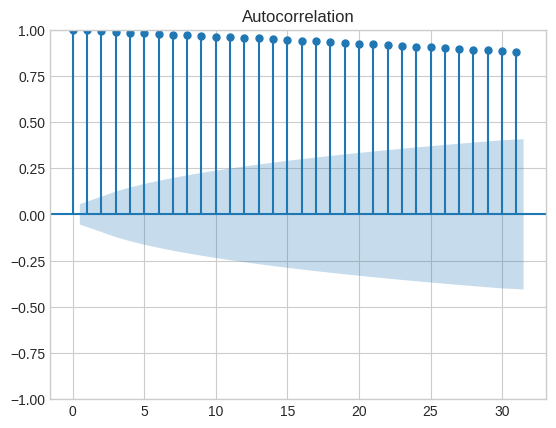

In [254]:
plot_acf(ts_data)
plt.show()

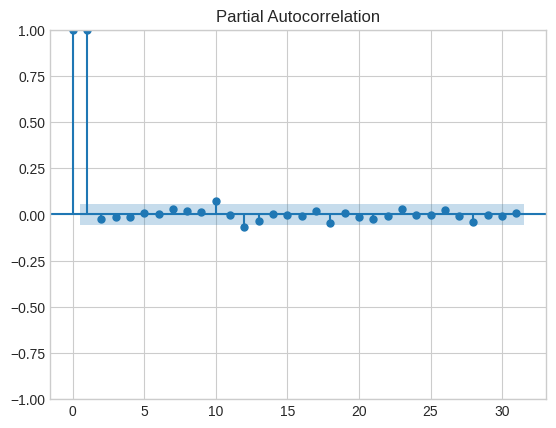

In [255]:
plot_pacf(ts_data)
plt.show()

In [256]:
# Train-Test Split

# Convert price to daily returns
ts_data = ts_data.pct_change()
ts_data = ts_data.dropna()


rate = 0.8
index = int(rate * len(ts_data))

ts_train = ts_data[:index]
ts_test = ts_data[index:]

print(f"ts_train shape: {ts_train.shape}, ts_test shape: {ts_test.shape}")

ts_train shape: (1005,), ts_test shape: (252,)


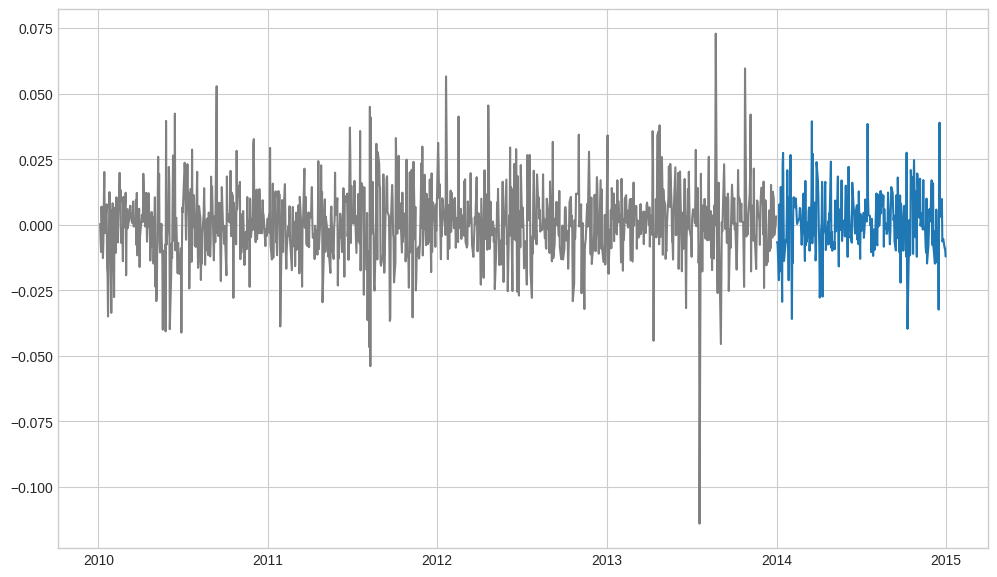

In [257]:
plt.figure(figsize = (12,7))

plt.plot(ts_train, color = 'gray')
plt.plot(ts_test)
plt.show()

## ARIMA

ARIMA, which stands for AutoRegressive Integrated Moving Average, is a popular
statistical method for time series forecasting. Here’s a brief breakdown:

AR (AutoRegressive): The model uses the dependency between an observation
and a number of lagged observations (previous time points).

I (Integrated): This involves differencing the time series to make it stationary, which often is necessary to apply ARIMA.

MA (Moving Average): The model incorporates the dependency between an
observation and a residual error from a moving average model applied to lagged
observations.

In [258]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts_train, order = (5, 0, 5))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1005
Model:                 ARIMA(5, 0, 5)   Log Likelihood                2841.106
Date:                Tue, 19 Mar 2024   AIC                          -5658.212
Time:                        15:39:43   BIC                          -5599.259
Sample:                             0   HQIC                         -5635.811
                               - 1005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.007      0.314      -0.000       0.001
ar.L1          0.6721      5.485      0.123      0.902     -10.077      11.422
ar.L2         -0.0287      8.505     -0.003      0.9

In [260]:
start_index = len(ts_train)
end_index = len(ts_data) -1

pred = model_fit.predict(start = start_index, end = end_index)

from sklearn import metrics
mse = metrics.mean_squared_error(ts_test, pred)
print(f'Mean Squared Error: {mse}\n')
print(f'Root Mean Squared Error: {np.sqrt(mse)}\n')
mae = metrics.mean_absolute_error(ts_test, pred)
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.000143182442740427

Root Mean Squared Error: 0.011965886625755193

Mean Absolute Error: 0.009164949481556989


Plot ARIMA Results

In [152]:
ts_results = pd.DataFrame(index = ts_data.index)

ts_results['CTR'] = np.cumprod(1 + ts_data.values) *1000
ts_results.loc[index:, 'ARIMA_pred'] = np.cumprod(1 + pred.values) *1000

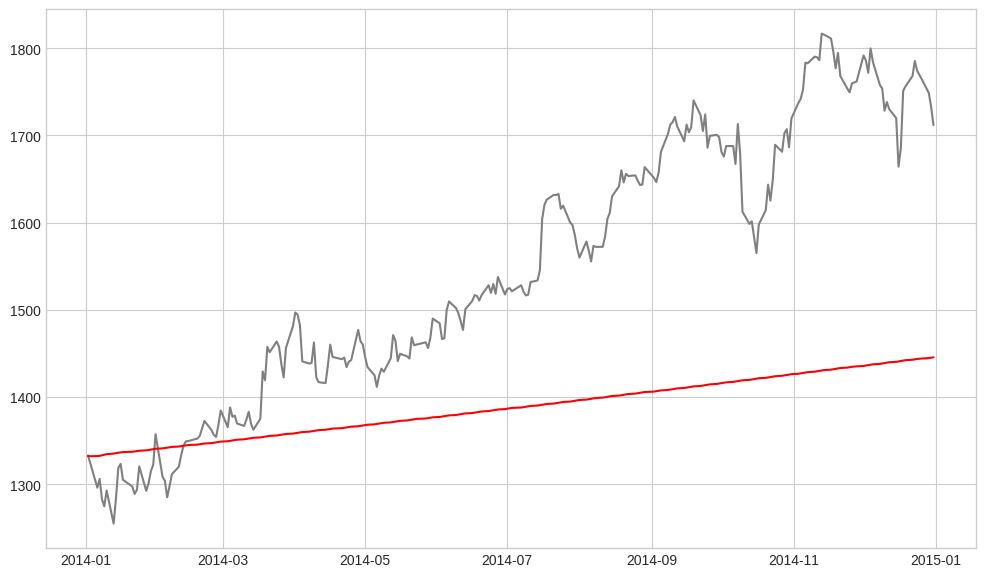

In [156]:
plt.figure(figsize = (12,7))

shift = ts_results['CTR'].iloc[index] - 1000

plt.plot(ts_results['CTR'].iloc[index:], color = 'gray')
plt.plot(ts_results['ARIMA_pred'] + shift, color = 'red')
plt.show()

ARIMA for Stock Price Prediction

Flat Line Prediction: ARIMA models can lead to ”flat line” forecasts for stock
prices, predicting little to no change over time.

Mean Reversion: The model may indicate that the stock prices revert to a
long-term mean, supporting the random walk hypothesis.

Stationarity Requirement: ARIMA requires data to be stationary, with
constant mean and variance, often achieved by differencing.

Forecasts Center Around Mean Zero: Post-differencing, ARIMA model
forecasts for stock prices typically show a mean of zero.

Efficient Market Reflection: Predictions hovering around zero suggest that the
market is efficient and the current price reflects all known information.

# Moving Average

In [261]:
ma_data = yf.download(tickers = 'MSFT', interval = "1d", start='2010-01-01', end='2015-01-01', group_by = 'column')

window_size = 50
ma_data['Moving_Avg'] = ma_data['Adj Close'].rolling(window=window_size).mean()

[*********************100%%**********************]  1 of 1 completed


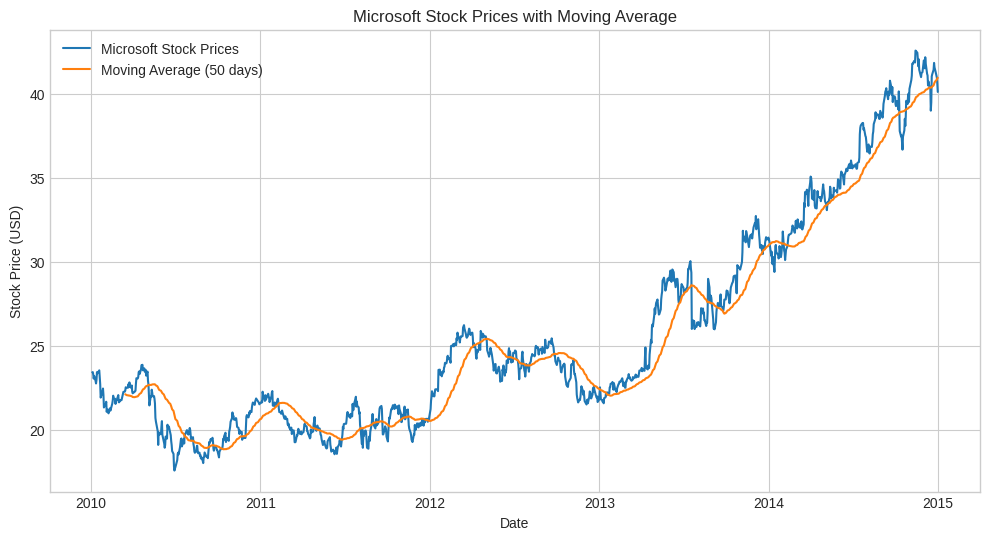

In [262]:
plt.figure(figsize=(12, 6))
plt.plot(ma_data['Adj Close'], label='Microsoft Stock Prices')
plt.plot(ma_data['Moving_Avg'], label=f'Moving Average ({window_size} days)')
plt.title('Microsoft Stock Prices with Moving Average')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

In [263]:
# Create features (use past 'window_size' days' moving averages as features)
for i in range(1, window_size + 1):
    ma_data[f'MA_Lag_{i}'] = ma_data['Moving_Avg'].shift(i)

ma_data.head()

,Open,High,Low,Close,Adj Close,Volume,Moving_Avg,MA_Lag_1,MA_Lag_2,MA_Lag_3,...,MA_Lag_41,MA_Lag_42,MA_Lag_43,MA_Lag_44,MA_Lag_45,MA_Lag_46,MA_Lag_47,MA_Lag_48,MA_Lag_49,MA_Lag_50
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,30.6200,31.1000,30.5900,30.9500,23.4316,38409100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.8500,31.1000,30.6400,30.9600,23.4392,49749600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.8800,31.0800,30.5200,30.7700,23.2953,58182400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.6300,30.7000,30.1900,30.4500,23.0531,50559700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,30.2800,30.8800,30.2400,30.6600,23.2120,51197400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mean Squared Error: 0.48229367390511224 

Root Mean Squared Error: 0.6944736668190611

Mean Absolute Error: 0.5394216686015495


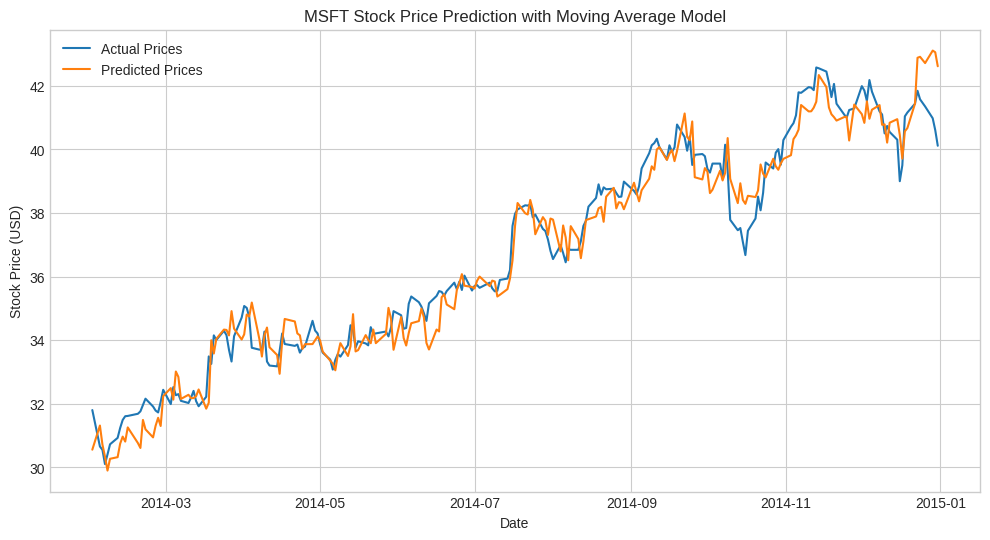

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

rate = 0.8
index = int(rate * len(ma_data))

# Drop NaN values resulting from the rolling mean and lag features
ma_data = ma_data.dropna()


X_train = ma_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume', 'Moving_Avg',], axis=1).iloc[:index, :]
y_train = ma_data['Adj Close'].iloc[:index]
X_test = ma_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume', 'Moving_Avg',], axis=1).iloc[index:, :]
y_test = ma_data['Adj Close'].iloc[index:]

# Train a linear regression model
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse} \n')
print(f'Root Mean Squared Error: {np.sqrt(mse)}\n')
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(ma_data.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(ma_data.index[-len(y_test):], y_pred, label='Predicted Prices')
plt.title('MSFT Stock Price Prediction with Moving Average Model')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

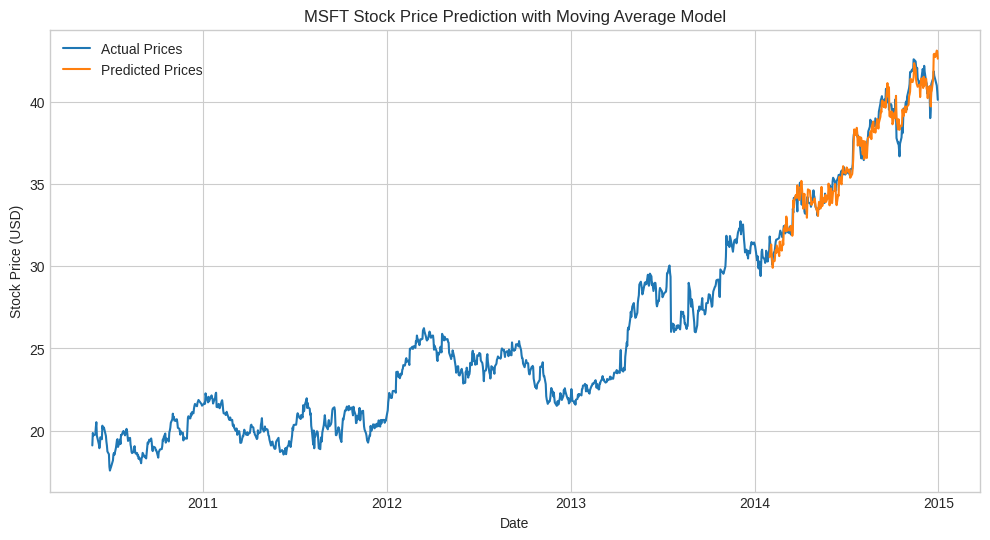

In [164]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(ma_data['Adj Close'], label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('MSFT Stock Price Prediction with Moving Average Model')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

In [168]:
ma_pred = y_pred

ma_results = pd.DataFrame(index = ma_data.index)
ma_results.loc[index:, 'MA_pred'] = ma_pred

In [169]:
ma_results['daily_returns'] = ma_results['MA_pred'].pct_change()

ma_results['cumulative_returns'] = (1 + ma_results['daily_returns']).cumprod()

initial_investment = 1000
ma_results['ma_CTR'] = ma_results['cumulative_returns'] * initial_investment

In [170]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.5394216686015495
Mean Squared Error: 0.48229367390511224
Root Mean Squared Error: 0.6944736668190611
R-squared: 0.9558745644951091


In [171]:
# Calculate metrics for in-sample data
in_sample_metrics = {
    "MAE (in-sample)": mean_absolute_error(y_train, model.predict(X_train)),
    "MSE (in-sample)": mean_squared_error(y_train, model.predict(X_train)),
    "RMSE (in-sample)": np.sqrt(mean_squared_error(y_train, model.predict(X_train))),
    "R-squared (in-sample)": model.rsquared
}

# Calculate metrics for out-of-sample data
out_sample_metrics = {
    "MAE (out-of-sample)": mae,
    "MSE (out-of-sample)": mse,
    "RMSE (out-of-sample)": rmse,
    "R-squared (out-of-sample)": r2
}

# Combine the metrics into a single DataFrame
metrics_df = pd.DataFrame.from_dict([in_sample_metrics, out_sample_metrics])

metrics_df

,MAE (in-sample),MSE (in-sample),RMSE (in-sample),R-squared (in-sample),MAE (out-of-sample),MSE (out-of-sample),RMSE (out-of-sample),R-squared (out-of-sample)
0,0.4333,0.3098,0.5566,0.9994,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.5394,0.4823,0.6945,0.9559


In [173]:
# print(model.summary())

# Gaussian Process Regression (GPR)


In [268]:
ts_data = yf.download(tickers = 'MSFT', interval = "1d", start='2010-01-01', end='2015-01-01', group_by = 'column')

[*********************100%%**********************]  1 of 1 completed


In [269]:
# Set Date as index

ts_data = ts_data.reset_index()
ts_data['Date'] = pd.to_datetime(ts_data['Date'])
ts_data.set_index('Date', inplace=True)

n_lags = 5

for lag in range(1, n_lags + 1):
        ts_data[f'lag_{lag}'] = ts_data['Adj Close'].shift(lag)

ts_data = ts_data.dropna()
ts_data.head()

,Open,High,Low,Close,Adj Close,Volume,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,,,,
2010-01-11,30.7100,30.7600,30.1200,30.2700,22.9168,68754700,23.2120,23.0531,23.2953,23.4392,23.4316
2010-01-12,30.1500,30.4000,29.9100,30.0700,22.7654,65912100,22.9168,23.2120,23.0531,23.2953,23.4392
2010-01-13,30.2600,30.5200,30.0100,30.3500,22.9773,51863500,22.7654,22.9168,23.2120,23.0531,23.2953
2010-01-14,30.3100,31.1000,30.2600,30.9600,23.4392,63228100,22.9773,22.7654,22.9168,23.2120,23.0531
2010-01-15,31.0800,31.2400,30.7100,30.8600,23.3635,79913200,23.4392,22.9773,22.7654,22.9168,23.2120


In [270]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error

X = ts_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'], axis=1)
y = ts_data['Adj Close']

split_idx = int(len(ts_data) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(X_train, y_train)

y_pred = gpr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.18605784828634644
Root Mean Squared Error: 0.43134423409423994

Mean Absolute Error: 0.32899831650775196


In [241]:
gpr_results = pd.DataFrame(index = ts_data.index)

gpr_results['MSFT_Adj Close'] = ts_data['Adj Close']
gpr_results.loc[X_test.index, 'gpr_pred'] = np.array(y_pred)

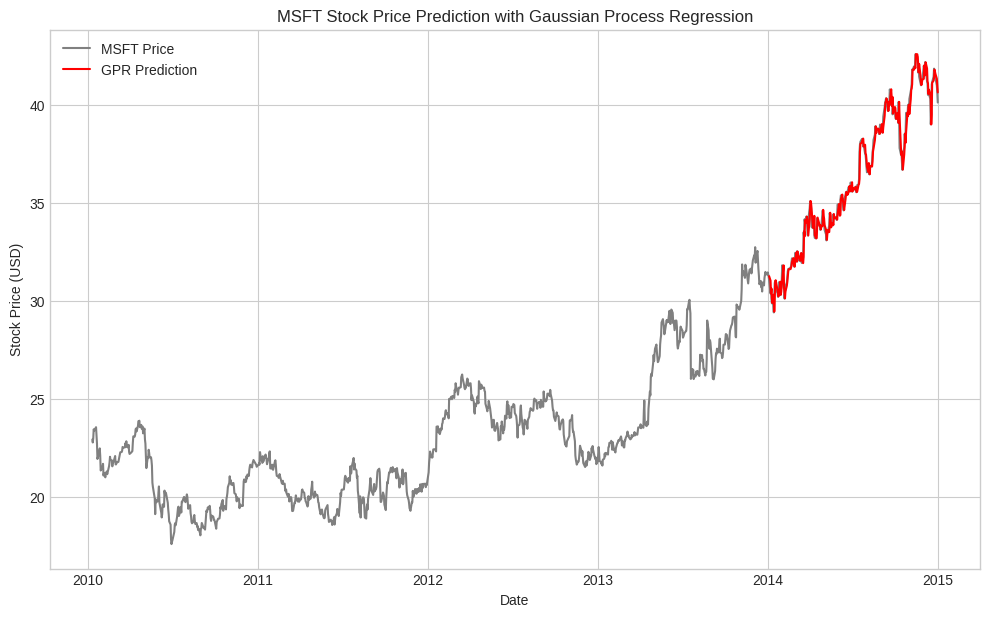

In [242]:
plt.figure(figsize = (12,7))
plt.plot(gpr_results['MSFT_Adj Close'], color = 'gray', label = 'MSFT Price')
plt.plot(gpr_results['gpr_pred'], color = 'red', label = 'GPR Prediction')
plt.title('MSFT Stock Price Prediction with Gaussian Process Regression')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

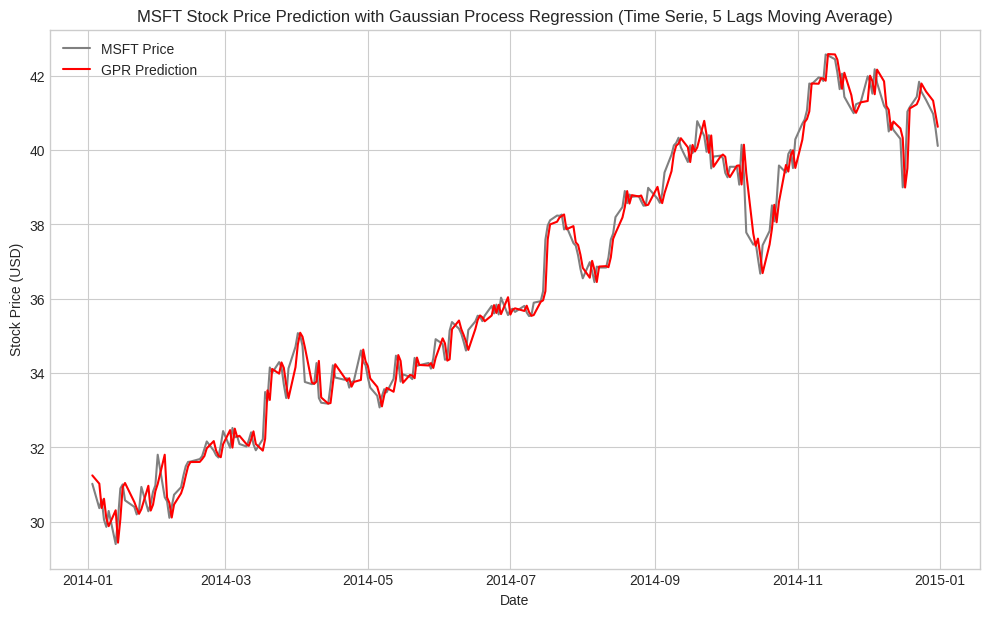

In [243]:
plt.figure(figsize = (12,7))
plt.plot(gpr_results['MSFT_Adj Close'].iloc[split_idx:], color = 'gray', label = 'MSFT Price')
plt.plot(gpr_results['gpr_pred'], color = 'red', label = 'GPR Prediction')
plt.title('MSFT Stock Price Prediction with Gaussian Process Regression (Time Serie, 5 Lags Moving Average)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

In [244]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
y_train_pred = gpr.predict(X_train)
y_test_pred = gpr.predict(X_test)

# Calculating metrics
metrics = {
    'RMSE': {
        'In-sample': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Out-of-sample': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    },
    'MAE': {
        'In-sample': mean_absolute_error(y_train, y_train_pred),
        'Out-of-sample': mean_absolute_error(y_test, y_test_pred),
    },
    'R2': {
        'In-sample': r2_score(y_train, y_train_pred),
        'Out-of-sample': r2_score(y_test, y_test_pred),
    }
}

# Creating DataFrame
metrics_df = pd.DataFrame(metrics)

metrics_df


,RMSE,MAE,R2
In-sample,0.3370,0.2391,0.9895
Out-of-sample,0.4313,0.3290,0.9855


# Conclusion

In [245]:
y_pred_series = pd.Series(y_pred.flatten(), index=y_test.index)

# Calculate daily returns for actual and predicted prices
daily_returns_actual = y_test.pct_change()
daily_returns_pred = y_pred_series.pct_change()

# Calculate cumulative returns for actual and predicted prices
cumulative_returns_actual = (1 + daily_returns_actual).cumprod()
cumulative_returns_pred = (1 + daily_returns_pred).cumprod()

# Calculate cumulative total return for the initial investment
initial_investment = 1000
cumulative_total_return_actual = initial_investment * cumulative_returns_actual
cumulative_total_return_pred = initial_investment * cumulative_returns_pred

cumulative_total_return_actual = cumulative_total_return_actual.fillna(method='bfill')
cumulative_total_return_pred = cumulative_total_return_pred.fillna(method='bfill')

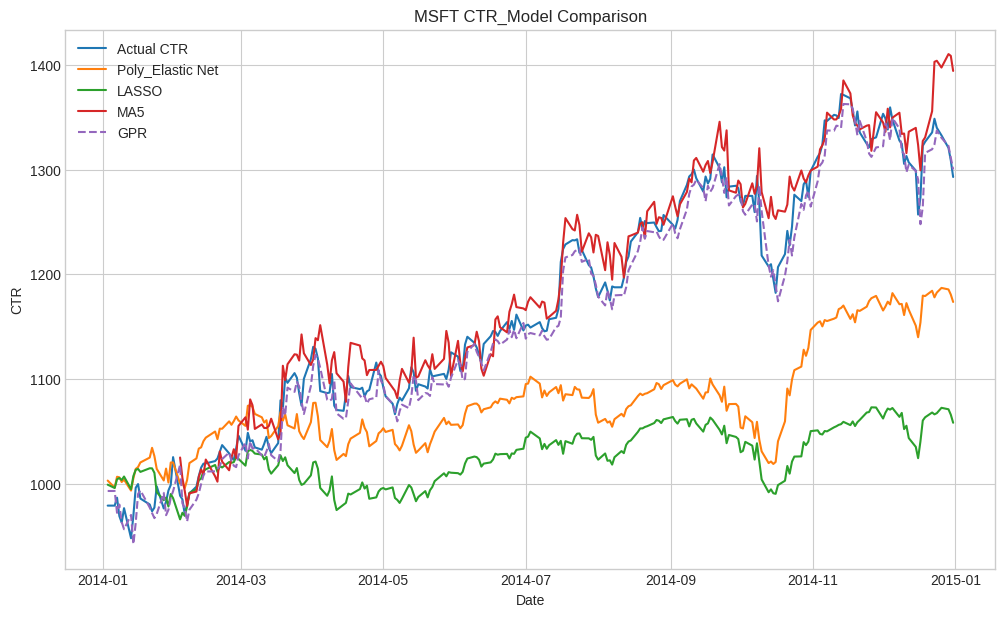

In [246]:
plt.figure(figsize = (12,7))

plt.plot(cumulative_total_return_actual, label = 'Actual CTR')
plt.plot(poly_results['poly_ElN_CTR'], label = 'Poly_Elastic Net')
plt.plot(df_results['LASSO_CTR'], label = 'LASSO')
plt.plot(ma_results['ma_CTR'], label = 'MA5', linestyle = '-')
plt.plot(cumulative_total_return_pred, label='GPR', linestyle='--')


plt.title('MSFT CTR_Model Comparison')
plt.xlabel('Date')
plt.ylabel('CTR')
plt.legend()
plt.show()

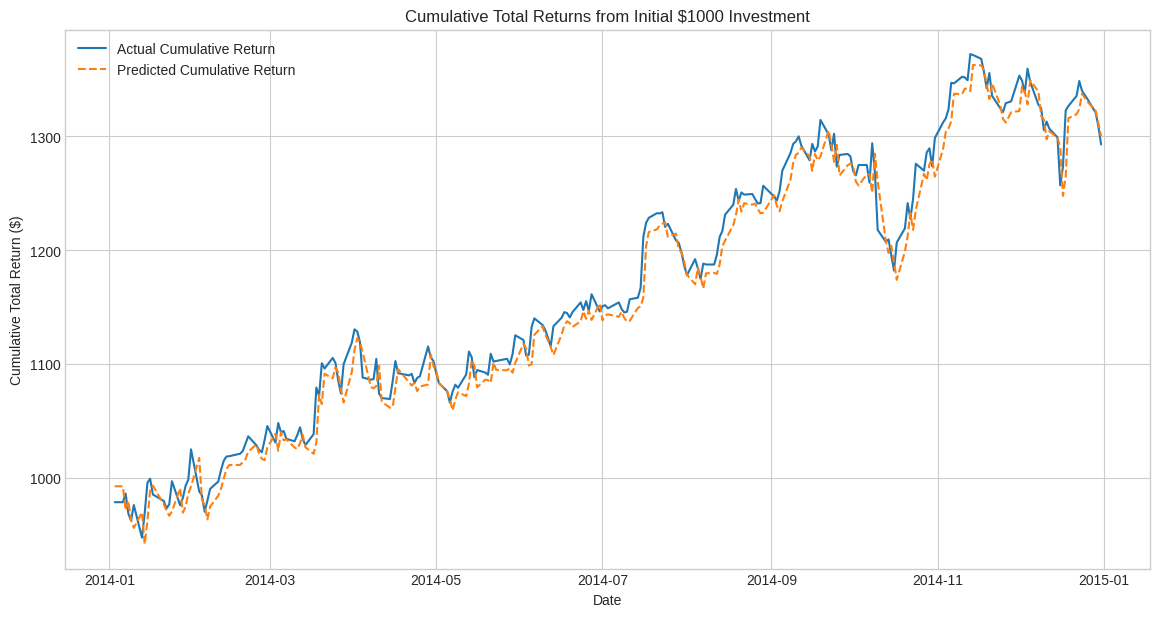

In [247]:
import matplotlib.pyplot as plt

# Assuming cumulative_total_return_actual and cumulative_total_return_pred are as calculated previously

plt.figure(figsize=(14, 7))
plt.plot(cumulative_total_return_actual, label='Actual Cumulative Return')
plt.plot(cumulative_total_return_pred, label='Predicted Cumulative Return', linestyle='--')

plt.title('Cumulative Total Returns from Initial $1000 Investment')
plt.xlabel('Date')
plt.ylabel('Cumulative Total Return ($)')
plt.legend()
plt.grid(True)

plt.show()


In [274]:
data_final = {
    'Model': ['Linear Regression', 'Lasso Regression', 'ElasticNet', 'ARIMA', 'MA (Price)', 'GPR (Price)'],
    'RMSE (Test)': [rmse_LR_test, rmse_LASSO_test, rmse_ElN_test, 0.011965886625755193, 0.6945, 0.4313442],
    'MAE (Test)': [mae_LR_test, mae_LASSO_test, mae_ElN_test, 0.009164949481556989, 0.5394, 0.32899]
}

com_table = pd.DataFrame(data_final)
com_table

,Model,RMSE (Test),MAE (Test)
0,Linear Regression,0.0102,0.0079
1,Lasso Regression,0.0098,0.0074
2,ElasticNet,0.0097,0.0074
3,ARIMA,0.0120,0.0092
4,MA (Price),0.6945,0.5394
5,GPR (Price),0.4313,0.3290
